In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from CogBeaconDataset import CogBeaconDataset

cogbeacon_root_path = '/Users/athenasaghi/VSProjects/CognitiveFatigueDetection/CogFatigueData/CogBeacon/'
dataset = CogBeaconDataset(cogbeacon_root_path)

In [ ]:
# import numpy as np
# from collections import defaultdict

# session_day = 'First'
# mode = 'o'
# for u in range(20):
#     if u == 18:
#         continue
#     rawdata = dataset.load_session_by_participant(u,session_day,mode,'')

#     labels = rawdata[1]
#     print(labels)
#     data_items = rawdata[0]

#     label_groups = defaultdict(list)

#     for label, item in zip(labels, data_items):
#         label_groups[int(label)].append(item)

#     for label, items in label_groups.items():
#         np.save(f'rawdata/l_{label}_{session_day}_{mode}_{u}.npy', np.array(items, dtype=object), allow_pickle=True)


session loaded successfully {'user_id': '0', 'stimuli_type': 'v', 'game_mode': 'o', 'session_day': 'First', 'wcst_version': 'o'} size of the session data 60
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
session loaded successfully {'user_id': '1', 'stimuli_type': 'v', 'game_mode': 'o', 'session_day': 'First', 'wcst_version': 'o'} size of the session data 60
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
session loaded successfully {'user_id': '2', 'stimuli_type': 'v', 'game_mode': 'o', 'session_day': 'First', 'wcst_version': 'o'} size of the session data 60
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [12]:
import os,pandas as pd,re
from collections import defaultdict

feature_path = '/Users/athenasaghi/Downloads/Fractional-dynamics-foster-deep-learning-of-COPDstage-prediction-main/'
label_groups=defaultdict(list)
pattern=r'L(\d+)_(\w+)_(\w+)_(\w+)_couplingMatrix\.csv'

for filename in os.listdir(feature_path):
    if filename.endswith('.csv'):
        match=re.match(pattern,filename)
        if match:
            user_id=int(match.group(4))
            file_path=os.path.join(feature_path,filename)
            df=pd.read_csv(file_path,header=None)
            label=int(match.group(1))
            if df.iloc[:,-1].dtype!=int or any(df.iloc[:,-1]!=label):
                df.iloc[:,-1]=label
                # df.to_csv(file_path,index=False,header=False)
            label_groups[label].append(df)


for label,dfs in label_groups.items():
    print(f"Label {label}: {len(dfs)} files")



Label 0: 44 files
Label 1: 16 files
Label 2: 13 files
Label 3: 7 files


### Load Features and Raw Data

In [65]:
# import os
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# import re

# feature_path='/Users/athenasaghi/Downloads/Fractional-dynamics-foster-deep-learning-of-COPDstage-prediction-main/'
# feature_dict=defaultdict(list)
# pattern=r'L(\d+)_(\w+)_(\w+)_(\w+)_couplingMatrix\.csv'
# for filename in os.listdir(feature_path):
#     if filename.endswith('.csv'):
#         match=re.match(pattern,filename)
#         if match:
#             user_id=int(match.group(4))
#             df=pd.read_csv(os.path.join(feature_path,filename),header=None)
#             feature_dict[user_id].append((np.array(df.iloc[:,:-1].values),int(df.iloc[:,-1].values[0])))

# # print(feature_dict['0'][0][0].shape, feature_dict['0'][0][1])



# raw_eeg_dict = defaultdict(list)
# for file in os.listdir('./rawdata/'):
#     if file.endswith('.npy'):
#         user_id = int(file.split('_')[4].split('.')[0])
#         label = int(file.split('_')[1])
#         # print(file , user_id , label)
#         if label > 3:
#             continue

#         raw_data = np.load(os.path.join('./rawdata/', file), allow_pickle=True)
#         for sample in raw_data:
#             r = np.array(sample).T
#             labels = np.full(r.shape[1], label)
            
#             df = pd.DataFrame(r.T, columns=[f'channel_{i}' for i in range(r.shape[0])])
#             df['label'] = labels
#             # if user_id == '0':
#             #     print("444",file , user_id , labels)
#             raw_eeg_dict[user_id].append(df)


# X_features, X_eeg, Y_labels = [], [], []
# print(sorted(set(feature_dict) & set(raw_eeg_dict)))
# for user_id in sorted(set(feature_dict) & set(raw_eeg_dict)):
#     for (f, label), df in zip(feature_dict[user_id], raw_eeg_dict[user_id]):
  
#         f_df = pd.DataFrame(f, columns=[f'feature_{i}' for i in range(f.shape[1])])
#         X_features.append(f_df)
#         X_eeg.append(df.drop(columns='label'))
#         if label == 3:
#             Y_labels.append(df['label'].values+1)
#         else:
#             Y_labels.append(df['label'].values)
# print(X_features[0].shape, X_eeg[0].shape,X_eeg[1].shape, Y_labels[0].shape)

# X_features = pd.concat(X_features, ignore_index=True)
# X_eeg = pd.concat(X_eeg, ignore_index=True)
# Y_labels = np.concatenate(Y_labels)
# print(X_eeg.shape, X_features.shape, Y_labels.shape)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19]
(201, 16) (1225, 4) (855, 4) (1225,)
(55092, 4) (12865, 16) (55092,)


In [142]:
# max_size = min(len(X_features), len(X_eeg))
# y_tensor = torch.from_numpy(Y_labels)
# indices_per_class = {h.item(): (y_tensor == h).nonzero(as_tuple=True)[0] for h in torch.unique(y_tensor)}
# indices_per_class

In [141]:

# selected_indices = []
# for h in range(4):
#     if h in indices_per_class and len(indices_per_class[h]) > 0:
#         selected_indices.append(indices_per_class[h][:1])




## Data processing

In [7]:
import os
import re
import numpy as np
import pandas as pd
from collections import defaultdict

feature_dict = defaultdict(list)
# feature_path = '/Users/athenasaghi/Downloads/Fractional-dynamics-foster-deep-learning-of-COPDstage-prediction-main/'
feature_path = '/Users/athenasaghi/Downloads/Fractional-dynamics-foster-deep-learning-of-COPDstage-prediction-main/First_m/'

pattern = r'L(\d+)_(\w+)_(\w+)_(\w+)_couplingMatrix\.csv'

for filename in os.listdir(feature_path):
    if filename.endswith('.csv'):
        match = re.match(pattern, filename)
        if match:
            user_id = int(match.group(4))
            df = pd.read_csv(os.path.join(feature_path, filename), header=None)
            feature_dict[user_id].append((np.array(df.iloc[:, :-1].values), int(df.iloc[:, -1].values[0])))

raw_eeg_dict = defaultdict(list)

for file in os.listdir('./rawdata/First_m/'):
    if file.endswith('.npy'):
        user_id = int(file.split('_')[4].split('.')[0])
        label = int(file.split('_')[1])
        if label >= 3:
            continue  

        raw_data = np.load(os.path.join('./rawdata/First_m/', file), allow_pickle=True)
        for sample in raw_data:
            r = np.array(sample).T
            labels = np.full(r.shape[1], label)

            df = pd.DataFrame(r.T, columns=[f'channel_{i}' for i in range(r.shape[0])])
            df['label'] = labels
            raw_eeg_dict[user_id].append(df)

max_feature_rows, max_feature_cols = 0, 0
max_eeg_rows, max_eeg_cols = 0, 0

for user_id in sorted(set(feature_dict) & set(raw_eeg_dict)):
    for (f, _), df in zip(feature_dict[user_id], raw_eeg_dict[user_id]):
        max_feature_rows = max(max_feature_rows, f.shape[0])
        max_feature_cols = max(max_feature_cols, f.shape[1])
        max_eeg_rows = max(max_eeg_rows, df.shape[0])
        max_eeg_cols = max(max_eeg_cols, df.shape[1] - 1)  # Exclude label column

def pad_or_truncate(arr, target_shape):
    padded = np.zeros(target_shape)
    min_rows = min(arr.shape[0], target_shape[0])
    min_cols = min(arr.shape[1], target_shape[1])
    padded[:min_rows, :min_cols] = arr[:min_rows, :min_cols]
    return padded

data = []

for user_id in sorted(set(feature_dict) & set(raw_eeg_dict)):
    for (f, feature_label), df in zip(feature_dict[user_id], raw_eeg_dict[user_id]):
        padded_feature = pad_or_truncate(f, (max_feature_rows, max_feature_cols))
        padded_eeg = pad_or_truncate(df.drop(columns='label').values, (max_eeg_rows, max_eeg_cols))

        label = feature_label  # Or use df['label'].values[0] if EEG labels are preferred

        data.append({
            'raweeg': padded_eeg,
            'features': padded_feature,
            'label': label
        })
df = pd.DataFrame(data)
df.to_pickle('processed_data.pkl')  # Save as a pickle file for later use

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   raweeg    34 non-null     object
 1   features  34 non-null     object
 2   label     34 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 948.0+ bytes


## KFOLD cross-validation

In [250]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, BatchNormalization, Dropout, LSTM, SpatialDropout1D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample


df = pd.read_pickle('processed_data.pkl')



X_raweeg = np.stack(df['raweeg'].values)
X_features = np.stack(df['features'].values)
Y_labels = df['label'].values

# Remove class 3
mask = Y_labels != 3
X_raweeg = X_raweeg[mask]
X_features = X_features[mask]
Y_labels = Y_labels[mask]

num_classes = len(np.unique(Y_labels))
Y_labels = to_categorical(Y_labels, num_classes=num_classes)

scaler = StandardScaler()
X_raweeg = scaler.fit_transform(X_raweeg.reshape(-1, X_raweeg.shape[-1])).reshape(X_raweeg.shape)
X_features = scaler.fit_transform(X_features.reshape(-1, X_features.shape[-1])).reshape(X_features.shape)

# Replace padding zeros with small noise to avoid learning issues
X_raweeg[X_raweeg == 0] = np.random.normal(loc=0, scale=1e-6, size=np.sum(X_raweeg == 0))

# Oversample minority classes
X_resampled, Y_resampled, Xf_resampled = [], [], []
labels = np.argmax(Y_labels, axis=1)
for cls in np.unique(labels):
    cls_indices = np.where(labels == cls)[0]
    X_cls_raweeg = X_raweeg[cls_indices]
    X_cls_features = X_features[cls_indices]
    Y_cls = Y_labels[cls_indices]
    X_cls_raweeg, Y_cls, X_cls_features = resample(X_cls_raweeg, Y_cls, X_cls_features, n_samples=max([len(np.where(labels == c)[0]) for c in np.unique(labels)]), random_state=42)
    X_resampled.append(X_cls_raweeg)
    Y_resampled.append(Y_cls)
    Xf_resampled.append(X_cls_features)

X_raweeg = np.vstack(X_resampled)
Y_labels = np.vstack(Y_resampled)
X_features = np.vstack(Xf_resampled)

# Split into train and test sets
X_train_raweeg, X_test_raweeg, X_train_features, X_test_features, Y_train, Y_test = train_test_split(
    X_raweeg, X_features, Y_labels, test_size=0.3, random_state=42, stratify=np.argmax(Y_labels, axis=1)
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)


X_test_list=[]
y_test_list=[]
test_loss=[]
train_loss=[]
test_acc=[]
train_acc=[]
test_auc=[]
train_auc=[]
val_acc = []
val_loss = []
val_auc = []


for train_index, val_index in kf.split(X_train_raweeg):
    X_train_fold_raweeg, X_val_raweeg = X_train_raweeg[train_index], X_train_raweeg[val_index]
    X_train_fold_features, X_val_features = X_train_features[train_index], X_train_features[val_index]
    Y_train_fold, Y_val = Y_train[train_index], Y_train[val_index]

    # Calculate and print class distribution
    train_classes, train_counts = np.unique(np.argmax(Y_train_fold, axis=1), return_counts=True)
    val_classes, val_counts = np.unique(np.argmax(Y_val, axis=1), return_counts=True)
    # Y_train_fold = to_categorical(Y_train_fold)
    # Y_val = to_categorical(Y_val)

    # print("Train set class distribution:")
    # for c, count in zip(train_classes, train_counts):
    #     print(f"Class {c}: {count} samples")

    # print("Validation set class distribution:")
    # for c, count in zip(val_classes, val_counts):
    #     print(f"Class {c}: {count} samples")

    input_raweeg = Input(shape=(X_raweeg.shape[1], X_raweeg.shape[2]))
    x_raweeg = LSTM(64, return_sequences=True)(input_raweeg)
    x_raweeg = SpatialDropout1D(0.5)(x_raweeg)
    x_raweeg = Flatten()(x_raweeg)
    x_raweeg = Dense(256, activation='relu')(x_raweeg)
    x_raweeg = BatchNormalization()(x_raweeg)
    x_raweeg = Dropout(0.6)(x_raweeg)
    x_raweeg = Dense(128, activation='relu')(x_raweeg)
    x_raweeg = BatchNormalization()(x_raweeg)
    x_raweeg = Dropout(0.6)(x_raweeg)

    input_features = Input(shape=(X_features.shape[1], X_features.shape[2]))
    x_features = LSTM(64, return_sequences=True)(input_features)
    x_features = SpatialDropout1D(0.5)(x_features)
    x_features = Flatten()(x_features)
    x_features = Dense(256, activation='relu')(x_features)
    x_features = BatchNormalization()(x_features)
    x_features = Dropout(0.6)(x_features)
    x_features = Dense(128, activation='relu')(x_features)
    x_features = BatchNormalization()(x_features)
    x_features = Dropout(0.6)(x_features)

    combined = Concatenate()([x_raweeg, x_features])


    output = Dense(num_classes, activation='softmax')(combined)

    model = Model(inputs=[input_raweeg, input_features], outputs=output)

    # model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5), loss=tf.keras.losses.CategoricalFocalCrossentropy(gamma=2.0), metrics=['accuracy'])
    model.compile(optimizer='rmsprop', loss='crossentropy', metrics=['accuracy', 'AUC'])


    history = model.fit(
        [X_train_fold_raweeg, X_train_fold_features],
        Y_train_fold,
        epochs=400,
        batch_size=64,
        validation_data=([X_val_raweeg, X_val_features], Y_val),
        # callbacks=[
        #     tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        #     tf.keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.5)
        # ]
    )
    train_acc.append(history.history['accuracy'])
    train_loss.append(history.history['loss'])
    train_auc.append(history.history['AUC'])
    val_acc.append(history.history['val_accuracy'])
    val_loss.append(history.history['val_loss'])
    val_auc.append(history.history['val_AUC'])

loss, accuracy,auc = model.evaluate([X_test_raweeg, X_test_features], Y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

np.save('train_loss2',train_loss)
np.save('val_loss2',val_loss)
np.save('train_acc2',train_acc)
np.save('val_acc2',val_acc)
np.save('train_auc2',train_auc)
np.save('val_auc2',val_auc)

Epoch 1/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - AUC: 0.3865 - accuracy: 0.2308 - loss: 2.3842 - val_AUC: 0.6786 - val_accuracy: 0.5714 - val_loss: 10.0016
Epoch 2/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - AUC: 0.6601 - accuracy: 0.5385 - loss: 1.7797 - val_AUC: 0.7551 - val_accuracy: 0.5714 - val_loss: 5.4377
Epoch 3/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - AUC: 0.7212 - accuracy: 0.5000 - loss: 1.3905 - val_AUC: 0.7551 - val_accuracy: 0.5714 - val_loss: 4.2961
Epoch 4/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - AUC: 0.8007 - accuracy: 0.5769 - loss: 1.0584 - val_AUC: 0.8316 - val_accuracy: 0.7143 - val_loss: 3.4361
Epoch 5/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - AUC: 0.9530 - accuracy: 0.9231 - loss: 0.4230 - val_AUC: 0.8316 - val_accuracy: 0.7143 - val_loss: 3.4973
Epoch 6/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - AUC: 0.8388 - accuracy: 0.6538 - loss: 0.9532 - val_AUC: 0.8520 - val_accuracy: 0.7143 - val_loss: 3.8313
Epoch 7/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/st

In [19]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [253]:
import matplotlib.pyplot as plt
train_loss_min=[]
train_loss_max=[]
train_loss_mean =[]
for i in range(0, 400):
    maxv=max(train_loss[0][i],train_loss[1][i],train_loss[2][i] , train_loss[3][i],train_loss[4][i])
    minv=min(train_loss[0][i],train_loss[1][i],train_loss[2][i],train_loss[3][i],train_loss[4][i])
    meanv=(train_loss[0][i]+train_loss[1][i]+train_loss[2][i]+train_loss[3][i]+train_loss[4][i]) /5
    train_loss_min.append(minv)
    train_loss_max.append(maxv)
    train_loss_mean.append(meanv)

val_loss_min=[]
val_loss_max=[]
val_loss_mean=[]
for i in range(0, 400):
    maxv=max(val_loss[0][i],val_loss[1][i],val_loss[2][i] , val_loss[3][i],val_loss[4][i])
    minv=min(val_loss[0][i],val_loss[1][i],val_loss[2][i] , val_loss[3][i],val_loss[4][i])
    meanv=(val_loss[0][i]+val_loss[1][i]+val_loss[2][i]+ val_loss[3][i]+val_loss[4][i]) /5
    val_loss_min.append(minv)
    val_loss_max.append(maxv)
    val_loss_mean.append(meanv)
    



In [254]:

i=399
w = np.array([val_loss[0][i],val_loss[1][i],val_loss[2][i] , val_loss[3][i],val_loss[4][i]])
s=np.std(w)
meanv=np.mean(w)
print(s, meanv)


1.8583659705844822 1.5112935900680895


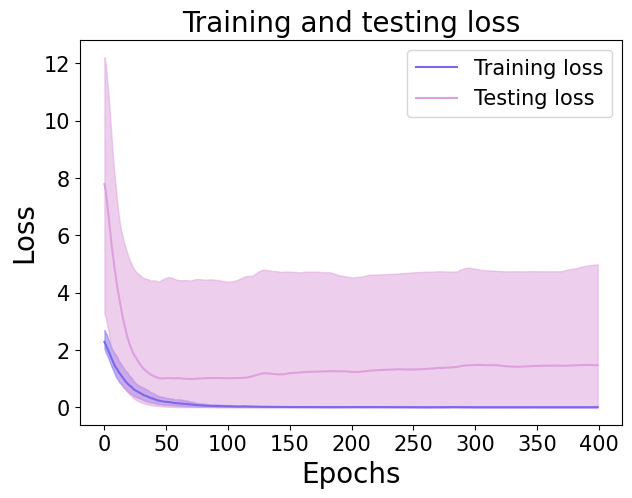

In [ ]:

epochs = range(0,400)

f=plt.figure(figsize=[7,5])
plt.plot(epochs, smooth_curve(train_loss_mean), 'k', color='mediumslateblue',label='Train loss')
plt.fill_between(epochs, smooth_curve(train_loss_min), smooth_curve(train_loss_max),alpha=0.5, edgecolor='mediumslateblue', facecolor='mediumslateblue')
plt.plot(epochs, smooth_curve(val_loss_mean), 'k', color='plum',label='Validation loss')
plt.fill_between(epochs, smooth_curve(val_loss_min), smooth_curve(val_loss_max),alpha=0.5, edgecolor='plum', facecolor='plum')
plt.title('Train and Validation loss',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig('Trainingloss7-5.png', dpi=600)

In [256]:
import matplotlib.pyplot as plt
train_acc_min=[]
train_acc_max=[]
train_acc_mean =[]
for i in range(0, 400):
    maxv=max(train_acc[0][i],train_acc[1][i],train_acc[2][i] , train_acc[3][i],train_acc[4][i])
    minv=min(train_acc[0][i],train_acc[1][i],train_acc[2][i],train_acc[3][i],train_acc[4][i])
    meanv=(train_acc[0][i]+train_acc[1][i]+train_acc[2][i]+train_acc[3][i]+train_acc[4][i]) /5
    train_acc_min.append(minv)
    train_acc_max.append(maxv)
    train_acc_mean.append(meanv)


val_acc_min=[]
val_acc_max=[]
val_acc_mean=[]
for i in range(0, 400):
        maxv=max(val_acc[0][i],val_acc[1][i],val_acc[2][i] , val_acc[3][i],val_acc[4][i])
        minv=min(val_acc[0][i],val_acc[1][i],val_acc[2][i] , val_acc[3][i],val_acc[4][i])
        meanv=(val_acc[0][i]+val_acc[1][i]+val_acc[2][i]+ val_acc[3][i]+val_acc[4][i]) /5
        val_acc_min.append(minv)
        val_acc_max.append(maxv)
        val_acc_mean.append(meanv)


i=399
w = np.array([val_acc[0][i],val_acc[1][i],val_acc[2][i],val_acc[3][i],val_acc[4][i]])
s=np.std(w)
meanv=np.mean(w)
print(s, meanv)

0.10690449039296519 0.8857142925262451


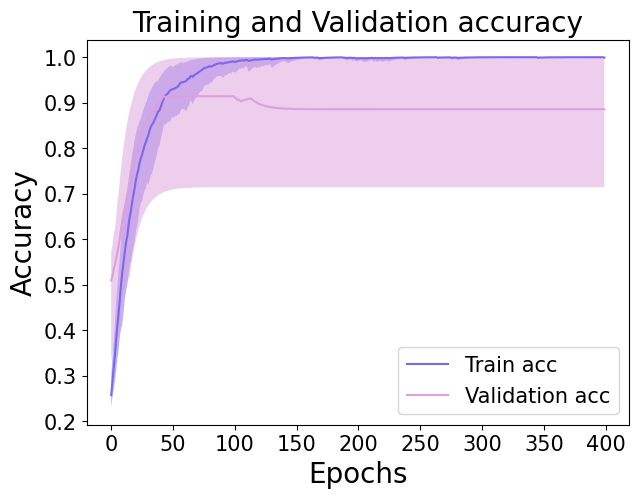

In [259]:
f=plt.figure(figsize=[7,5])
plt.plot(epochs, smooth_curve(train_acc_mean), 'k', color='mediumslateblue',label='Train acc')
plt.fill_between(epochs, smooth_curve(train_acc_min), smooth_curve(train_acc_max),alpha=0.5, facecolor='mediumslateblue')
plt.plot(epochs, smooth_curve(val_acc_mean), 'k', color='plum',label='Validation acc')
plt.fill_between(epochs, smooth_curve(val_acc_min), smooth_curve(val_acc_max),alpha=0.5, facecolor='plum')
plt.title('Training and Validation accuracy',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(["train","test"],loc="upper left")
plt.legend(loc = 4,fontsize=15)
plt.savefig('Trainingacc2.png', dpi=600)
plt.show()


/var/folders/_t/wkz76zf10112hkp5k80v9w540000gp/T/ipykernel_36547/2923517501.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, smooth_curve(train_auc_mean), 'k', color='mediumslateblue',label='Training auc')
/var/folders/_t/wkz76zf10112hkp5k80v9w540000gp/T/ipykernel_36547/2923517501.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, smooth_curve(val_auc_mean), 'k', color='plum',label='Validation auc')


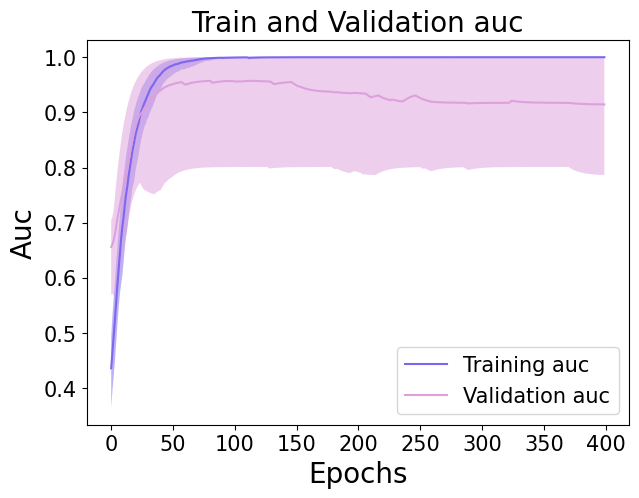

In [22]:
import matplotlib.pyplot as plt

train_auc = np.load('train_auc2.npy')
val_auc = np.load('/Users/athenasaghi/Downloads/val_auc_values_5x400.npy')
epochs = range(0,400)
train_auc_min=[]
train_auc_max=[]
train_auc_mean=[]
for i in range(0, 400):
    maxv=max(train_auc[0][i],train_auc[1][i],train_auc[2][i],train_auc[3][i],train_auc[4][i])
    minv=min(train_auc[0][i],train_auc[1][i],train_auc[2][i],train_auc[3][i],train_auc[4][i])
    meanv=(train_auc[0][i]+train_auc[1][i]+train_auc[2][i]+train_auc[3][i]+train_auc[4][i]) /5
    train_auc_min.append(minv)
    train_auc_max.append(maxv)
    train_auc_mean.append(meanv)

val_auc_min=[]
val_auc_max=[]
val_auc_mean=[]
for i in range(0, 400):
        maxv=max(val_auc[0][i],val_auc[1][i],val_auc[2][i],val_auc[3][i],val_auc[4][i])
        minv=min(val_auc[0][i],val_auc[1][i],val_auc[2][i],val_auc[3][i],val_auc[4][i])
        meanv=(val_auc[0][i]+val_auc[1][i]+val_auc[2][i]+val_auc[3][i]+val_auc[4][i]) /5
        val_auc_min.append(minv)
        val_auc_max.append(maxv)
        val_auc_mean.append(meanv)


f=plt.figure(figsize=[7,5])
plt.plot(epochs, smooth_curve(train_auc_mean), 'k', color='mediumslateblue',label='Training auc')
plt.fill_between(epochs, smooth_curve(train_auc_min), smooth_curve(train_auc_max),alpha=0.5, facecolor='mediumslateblue')
plt.plot(epochs, smooth_curve(val_auc_mean), 'k', color='plum',label='Validation auc')
plt.fill_between(epochs, smooth_curve(val_auc_min), smooth_curve(val_auc_max),alpha=0.5, facecolor='plum')
plt.title('Train and Validation auc',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Auc',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(["train","test"],loc="upper left")
plt.legend(loc = 4,fontsize=15)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/ML/Trainingauc.png', dpi=600)
plt.show()


In [59]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, BatchNormalization, Dropout, LSTM, SpatialDropout1D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample


df = pd.read_pickle('processed_data.pkl')



X_raweeg = np.stack(df['raweeg'].values)
X_features = np.stack(df['features'].values)
Y_labels = df['label'].values

# Remove class 3
mask = Y_labels != 3
X_raweeg = X_raweeg[mask]
X_features = X_features[mask]
Y_labels = Y_labels[mask]

num_classes = len(np.unique(Y_labels))
Y_labels = to_categorical(Y_labels, num_classes=num_classes)

scaler = StandardScaler()
X_raweeg = scaler.fit_transform(X_raweeg.reshape(-1, X_raweeg.shape[-1])).reshape(X_raweeg.shape)
X_features = scaler.fit_transform(X_features.reshape(-1, X_features.shape[-1])).reshape(X_features.shape)

# Replace padding zeros with small noise to avoid learning issues
X_raweeg[X_raweeg == 0] = np.random.normal(loc=0, scale=1e-6, size=np.sum(X_raweeg == 0))

# Oversample minority classes
X_resampled, Y_resampled, Xf_resampled = [], [], []
labels = np.argmax(Y_labels, axis=1)
for cls in np.unique(labels):
    cls_indices = np.where(labels == cls)[0]
    X_cls_raweeg = X_raweeg[cls_indices]
    X_cls_features = X_features[cls_indices]
    Y_cls = Y_labels[cls_indices]
    X_cls_raweeg, Y_cls, X_cls_features = resample(X_cls_raweeg, Y_cls, X_cls_features, n_samples=max([len(np.where(labels == c)[0]) for c in np.unique(labels)]), random_state=42)
    X_resampled.append(X_cls_raweeg)
    Y_resampled.append(Y_cls)
    Xf_resampled.append(X_cls_features)

X_raweeg = np.vstack(X_resampled)
Y_labels = np.vstack(Y_resampled)
X_features = np.vstack(Xf_resampled)

# Split into train and test sets
X_train_raweeg, X_test_raweeg, X_train_features, X_test_features, Y_train, Y_test = train_test_split(
    X_raweeg, X_features, Y_labels, test_size=0.5, random_state=42, stratify=np.argmax(Y_labels, axis=1)
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)


X_test_list_kfold = []
y_test_list_kfold = []
test_loss_kfold = []
train_loss_kfold = []
test_acc_kfold = []
train_acc_kfold = []
test_auc_kfold = []
train_auc_kfold = []
val_acc_kfold = []
val_loss_kfold = []
val_auc_kfold = []


for train_index, val_index in kf.split(X_train_raweeg):
    X_train_fold_raweeg, X_val_raweeg = X_train_raweeg[train_index], X_train_raweeg[val_index]
    X_train_fold_features, X_val_features = X_train_features[train_index], X_train_features[val_index]
    Y_train_fold, Y_val = Y_train[train_index], Y_train[val_index]

    # Calculate and print class distribution
    train_classes, train_counts = np.unique(np.argmax(Y_train_fold, axis=1), return_counts=True)
    val_classes, val_counts = np.unique(np.argmax(Y_val, axis=1), return_counts=True)
    # Y_train_fold = to_categorical(Y_train_fold)
    # Y_val = to_categorical(Y_val)

    # print("Train set class distribution:")
    # for c, count in zip(train_classes, train_counts):
    #     print(f"Class {c}: {count} samples")

    # print("Validation set class distribution:")
    # for c, count in zip(val_classes, val_counts):
    #     print(f"Class {c}: {count} samples")

    input_raweeg = Input(shape=(X_raweeg.shape[1], X_raweeg.shape[2]))
    x_raweeg = LSTM(64, return_sequences=True)(input_raweeg)
    x_raweeg = SpatialDropout1D(0.5)(x_raweeg)
    x_raweeg = Flatten()(x_raweeg)
    x_raweeg = Dense(256, activation='relu')(x_raweeg)
    x_raweeg = BatchNormalization()(x_raweeg)
    x_raweeg = Dropout(0.6)(x_raweeg)
    x_raweeg = Dense(128, activation='relu')(x_raweeg)
    x_raweeg = BatchNormalization()(x_raweeg)
    x_raweeg = Dropout(0.6)(x_raweeg)

    input_features = Input(shape=(X_features.shape[1], X_features.shape[2]))
    x_features = LSTM(64, return_sequences=True)(input_features)
    x_features = SpatialDropout1D(0.5)(x_features)
    x_features = Flatten()(x_features)
    x_features = Dense(256, activation='relu')(x_features)
    x_features = BatchNormalization()(x_features)
    x_features = Dropout(0.6)(x_features)
    x_features = Dense(128, activation='relu')(x_features)
    x_features = BatchNormalization()(x_features)
    x_features = Dropout(0.6)(x_features)

    combined = Concatenate()([x_raweeg, x_features])


    output = Dense(num_classes, activation='softmax')(combined)

    model = Model(inputs=[input_raweeg, input_features], outputs=output)

    # model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5), loss=tf.keras.losses.CategoricalFocalCrossentropy(gamma=2.0), metrics=['accuracy'])
    model.compile(optimizer='rmsprop', loss='crossentropy', metrics=['accuracy', 'AUC'])


    history = model.fit(
        [X_train_fold_raweeg, X_train_fold_features],
        Y_train_fold,
        epochs=400,
        batch_size=64,
        validation_data=([X_val_raweeg, X_val_features], Y_val),
        # callbacks=[
        #     tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        #     tf.keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.5)
        # ]
    )
    train_acc_kfold.append(history.history['accuracy'])
    train_loss_kfold.append(history.history['loss'])
    train_auc_kfold.append(history.history['AUC'])
    val_acc_kfold.append(history.history['val_accuracy'])
    val_loss_kfold.append(history.history['val_loss'])
    val_auc_kfold.append(history.history['val_AUC'])

loss, accuracy, auc = model.evaluate([X_test_raweeg, X_test_features], Y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

np.save('train_loss2_kfold', train_loss_kfold)
np.save('val_loss2_kfold', val_loss_kfold)
np.save('train_acc2_kfold', train_acc_kfold)
np.save('val_acc2_kfold', val_acc_kfold)
np.save('train_auc2_kfold', train_auc_kfold)
np.save('val_auc2_kfold', val_auc_kfold)

Epoch 1/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - AUC: 0.5744 - accuracy: 0.4500 - loss: 2.1175 - val_AUC: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.1448
Epoch 2/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - AUC: 0.5119 - accuracy: 0.3000 - loss: 2.1178 - val_AUC: 0.7200 - val_accuracy: 0.4000 - val_loss: 1.7106
Epoch 3/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - AUC: 0.7262 - accuracy: 0.5500 - loss: 1.1014 - val_AUC: 0.6300 - val_accuracy: 0.4000 - val_loss: 2.3687
Epoch 4/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - AUC: 0.8637 - accuracy: 0.6500 - loss: 1.0316 - val_AUC: 0.6400 - val_accuracy: 0.4000 - val_loss: 3.6537
Epoch 5/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - AUC: 0.7056 - accuracy: 0.6000 - loss: 1.5711 - val_AUC: 0.6000 - val_accuracy: 0.4000 - val_loss: 3.8773
Epoch 6/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - AUC: 0.8250 - accuracy: 0.6500 - loss: 1.0447 - val_AUC: 0.6200 - val_accuracy: 0.4000 - val_loss: 3.4126
Epoch 7/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/ste

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


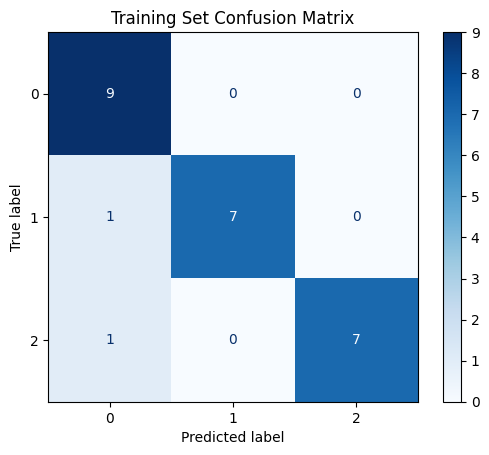

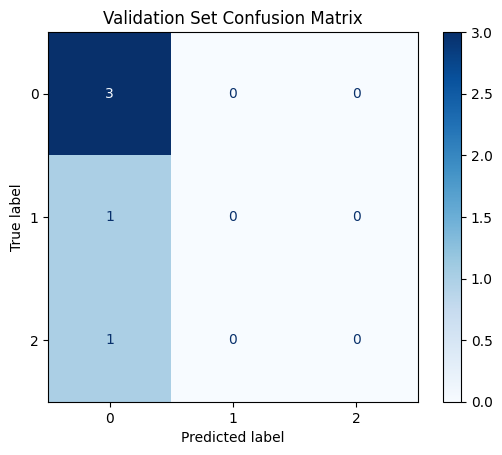

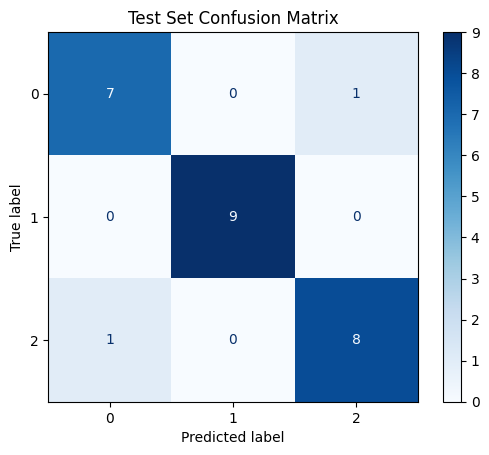

In [60]:
# Plot and save confusion matrix for training set
train_preds = model.predict([X_train_raweeg, X_train_features])
train_preds_classes = np.argmax(train_preds, axis=1)
train_true_classes = np.argmax(Y_train, axis=1)
cm_train = confusion_matrix(train_true_classes, train_preds_classes)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap='Blues')
plt.title('Training Set Confusion Matrix')
plt.savefig('confusion_matrix_train_kfold.png')

# Calculate and save metrics for training set
train_precision = precision_score(train_true_classes, train_preds_classes, average='weighted')
train_recall = recall_score(train_true_classes, train_preds_classes, average='weighted')
train_f1 = f1_score(train_true_classes, train_preds_classes, average='weighted')
np.save('train_metrics_kfold.npy', [train_precision, train_recall, train_f1])

# Plot and save confusion matrix for validation set
val_preds = model.predict([X_val_raweeg, X_val_features])
val_preds_classes = np.argmax(val_preds, axis=1)
val_true_classes = np.argmax(Y_val, axis=1)
cm_val = confusion_matrix(val_true_classes, val_preds_classes)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp_val.plot(cmap='Blues')
plt.title('Validation Set Confusion Matrix')
plt.savefig('confusion_matrix_validation_kfold.png')

# Calculate and save metrics for validation set
val_precision = precision_score(val_true_classes, val_preds_classes, average='weighted')
val_recall = recall_score(val_true_classes, val_preds_classes, average='weighted')
val_f1 = f1_score(val_true_classes, val_preds_classes, average='weighted')
np.save('val_metrics_kfold.npy', [val_precision, val_recall, val_f1])

# Plot and save confusion matrix for test set
test_preds = model.predict([X_test_raweeg, X_test_features])
test_preds_classes = np.argmax(test_preds, axis=1)
test_true_classes = np.argmax(Y_test, axis=1)
cm_test = confusion_matrix(test_true_classes, test_preds_classes)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(cmap='Blues')
plt.title('Test Set Confusion Matrix')
plt.savefig('confusion_matrix_test_kfold.png')

# Calculate and save metrics for test set
test_precision = precision_score(test_true_classes, test_preds_classes, average='weighted')
test_recall = recall_score(test_true_classes, test_preds_classes, average='weighted')
test_f1 = f1_score(test_true_classes, test_preds_classes, average='weighted')
np.save('test_metrics_kfold.npy', [test_precision, test_recall, test_f1])

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, BatchNormalization, Dropout, LSTM, SpatialDropout1D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

df = pd.read_pickle('processed_data.pkl')

X_raweeg = np.stack(df['raweeg'].values)
X_features = np.stack(df['features'].values)
Y_labels = df['label'].values

# Remove class 3
mask = Y_labels != 3
X_raweeg, X_features, Y_labels = X_raweeg[mask], X_features[mask], Y_labels[mask]

num_classes = len(np.unique(Y_labels))
Y_labels = to_categorical(Y_labels, num_classes=num_classes)

scaler = StandardScaler()
X_raweeg = scaler.fit_transform(X_raweeg.reshape(-1, X_raweeg.shape[-1])).reshape(X_raweeg.shape)
X_features = scaler.fit_transform(X_features.reshape(-1, X_features.shape[-1])).reshape(X_features.shape)

# Avoid learning issues by replacing zeros with small noise
X_raweeg[X_raweeg == 0] = np.random.normal(loc=0, scale=1e-6, size=np.sum(X_raweeg == 0))

# Oversample minority classes
X_resampled, Y_resampled, Xf_resampled = [], [], []
labels = np.argmax(Y_labels, axis=1)
max_samples = max(np.bincount(labels))
for cls in np.unique(labels):
    cls_indices = np.where(labels == cls)[0]
    X_cls_raweeg, X_cls_features, Y_cls = X_raweeg[cls_indices], X_features[cls_indices], Y_labels[cls_indices]
    X_cls_raweeg, Y_cls, X_cls_features = resample(X_cls_raweeg, Y_cls, X_cls_features, 
                                                   n_samples=max_samples, random_state=42)
    X_resampled.append(X_cls_raweeg)
    Y_resampled.append(Y_cls)
    Xf_resampled.append(X_cls_features)

X_raweeg, Y_labels, X_features = np.vstack(X_resampled), np.vstack(Y_resampled), np.vstack(Xf_resampled)

# Train-Test Split
X_train_raweeg, X_test_raweeg, X_train_features, X_test_features, Y_train, Y_test = train_test_split(
    X_raweeg, X_features, Y_labels, test_size=0.2, random_state=42, stratify=np.argmax(Y_labels, axis=1)
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

metrics = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": [], "train_auc": [], "val_auc": []}

for train_index, val_index in kf.split(X_train_raweeg):
    X_train_fold_raweeg, X_val_raweeg = X_train_raweeg[train_index], X_train_raweeg[val_index]
    X_train_fold_features, X_val_features = X_train_features[train_index], X_train_features[val_index]
    Y_train_fold, Y_val = Y_train[train_index], Y_train[val_index]

    # Define Model
    input_raweeg = Input(shape=(X_raweeg.shape[1], X_raweeg.shape[2]))
    x_raweeg = LSTM(64, return_sequences=True)(input_raweeg)
    x_raweeg = SpatialDropout1D(0.3)(x_raweeg)
    x_raweeg = Flatten()(x_raweeg)
    x_raweeg = Dense(256, kernel_regularizer=l2(1e-4))(x_raweeg)
    x_raweeg = BatchNormalization()(x_raweeg)
    x_raweeg = tf.keras.activations.relu(x_raweeg)
    x_raweeg = Dropout(0.5)(x_raweeg)
    x_raweeg = Dense(128, kernel_regularizer=l2(1e-4))(x_raweeg)
    x_raweeg = BatchNormalization()(x_raweeg)
    x_raweeg = tf.keras.activations.relu(x_raweeg)
    x_raweeg = Dropout(0.5)(x_raweeg)

    input_features = Input(shape=(X_features.shape[1], X_features.shape[2]))
    x_features = LSTM(64, return_sequences=True)(input_features)
    x_features = SpatialDropout1D(0.3)(x_features)
    x_features = Flatten()(x_features)
    x_features = Dense(256, kernel_regularizer=l2(1e-4))(x_features)
    x_features = BatchNormalization()(x_features)
    x_features = tf.keras.activations.relu(x_features)
    x_features = Dropout(0.5)(x_features)
    x_features = Dense(128, kernel_regularizer=l2(1e-4))(x_features)
    x_features = BatchNormalization()(x_features)
    x_features = tf.keras.activations.relu(x_features)
    x_features = Dropout(0.5)(x_features)

    combined = Concatenate()([x_raweeg, x_features])
    output = Dense(num_classes, activation='softmax')(combined)

    model = Model(inputs=[input_raweeg, input_features], outputs=output)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss="categorical_crossentropy",
        metrics=["accuracy", tf.keras.metrics.AUC(name="AUC")]
    )

    history = model.fit(
        [X_train_fold_raweeg, X_train_fold_features],
        Y_train_fold,
        epochs=100,
        batch_size=64,
        validation_data=([X_val_raweeg, X_val_features], Y_val),
        callbacks=[
            # tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
            tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, factor=0.5, min_lr=1e-6)
        ]
    )

    # Store Metrics
    metrics["train_loss"].append(history.history["loss"])
    metrics["val_loss"].append(history.history["val_loss"])
    metrics["train_acc"].append(history.history["accuracy"])
    metrics["val_acc"].append(history.history["val_accuracy"])
    metrics["train_auc"].append(history.history["AUC"])
    metrics["val_auc"].append(history.history["val_AUC"])

# Evaluate on Test Set
loss, accuracy, auc = model.evaluate([X_test_raweeg, X_test_features], Y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test AUC: {auc:.4f}")

# # Save Metrics
# np.save('train_loss2.npy', metrics["train_loss"])
# np.save('val_loss2.npy', metrics["val_loss"])
# np.save('train_acc2.npy', metrics["train_acc"])
# np.save('val_acc2.npy', metrics["val_acc"])
# np.save('train_auc2.npy', metrics["train_auc"])
# np.save('val_auc2.npy', metrics["val_auc"])


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - AUC: 0.5582 - accuracy: 0.3158 - loss: 1.5293 - val_AUC: 0.5650 - val_accuracy: 0.5000 - val_loss: 1.2323 - learning_rate: 1.0000e-04
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step - AUC: 0.7081 - accuracy: 0.5263 - loss: 1.2204 - val_AUC: 0.6725 - val_accuracy: 0.4000 - val_loss: 1.1304 - learning_rate: 1.0000e-04
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step - AUC: 0.7824 - accuracy: 0.6053 - loss: 1.0743 - val_AUC: 0.8025 - val_accuracy: 0.5000 - val_loss: 1.0336 - learning_rate: 1.0000e-04
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step - AUC: 0.8085 - accuracy: 0.6053 - loss: 0.9981 - val_AUC: 0.8200 - val_accuracy: 0.6000 - val_loss: 0.9470 - learning_rate: 1.0000e-04
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step - AUC: 0.8274 - accuracy: 0.6842 - loss: 1.0298 - val_AUC: 0.8500 - val_accuracy: 0.6000 - val_loss: 0.8729 - learning_rate: 1.0000e-04
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step - AUC: 0.8057 - a

In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, BatchNormalization, Dropout, LSTM, SpatialDropout1D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Load Data
df = pd.read_pickle('processed_data.pkl')

X_raweeg = np.stack(df['raweeg'].values)
X_features = np.stack(df['features'].values)
Y_labels = df['label'].values

# Remove class 3
mask = Y_labels != 3
X_raweeg = X_raweeg[mask]
X_features = X_features[mask]
Y_labels = Y_labels[mask]

num_classes = len(np.unique(Y_labels))
Y_labels = to_categorical(Y_labels, num_classes=num_classes)

# Standardize data
scaler = StandardScaler()
X_raweeg = scaler.fit_transform(X_raweeg.reshape(-1, X_raweeg.shape[-1])).reshape(X_raweeg.shape)
X_features = scaler.fit_transform(X_features.reshape(-1, X_features.shape[-1])).reshape(X_features.shape)

# Replace padding zeros with small noise to avoid learning issues
X_raweeg[X_raweeg == 0] = np.random.normal(loc=0, scale=1e-6, size=np.sum(X_raweeg == 0))

# Oversampling to balance classes
X_resampled, Y_resampled, Xf_resampled = [], [], []
labels = np.argmax(Y_labels, axis=1)
for cls in np.unique(labels):
    cls_indices = np.where(labels == cls)[0]
    X_cls_raweeg = X_raweeg[cls_indices]
    X_cls_features = X_features[cls_indices]
    Y_cls = Y_labels[cls_indices]
    X_cls_raweeg, Y_cls, X_cls_features = resample(
        X_cls_raweeg, Y_cls, X_cls_features,
        n_samples=max([len(np.where(labels == c)[0]) for c in np.unique(labels)]),
        random_state=42
    )
    X_resampled.append(X_cls_raweeg)
    Y_resampled.append(Y_cls)
    Xf_resampled.append(X_cls_features)

X_raweeg = np.vstack(X_resampled)
Y_labels = np.vstack(Y_resampled)
X_features = np.vstack(Xf_resampled)

# KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

max_test_acc = []
max_test_auc = []

for train_index, test_index in kf.split(X_raweeg):
    X_train_fold_raweeg, X_test_fold_raweeg = X_raweeg[train_index], X_raweeg[test_index]
    X_train_fold_features, X_test_fold_features = X_features[train_index], X_features[test_index]
    Y_train_fold, Y_test_fold = Y_labels[train_index], Y_labels[test_index]

    input_raweeg = Input(shape=(X_raweeg.shape[1], X_raweeg.shape[2]))
    x_raweeg = LSTM(64, return_sequences=True)(input_raweeg)
    x_raweeg = SpatialDropout1D(0.5)(x_raweeg)
    x_raweeg = Flatten()(x_raweeg)
    x_raweeg = Dense(256, activation='relu')(x_raweeg)
    x_raweeg = BatchNormalization()(x_raweeg)
    x_raweeg = Dropout(0.6)(x_raweeg)
    x_raweeg = Dense(128, activation='relu')(x_raweeg)
    x_raweeg = BatchNormalization()(x_raweeg)
    x_raweeg = Dropout(0.6)(x_raweeg)

    input_features = Input(shape=(X_features.shape[1], X_features.shape[2]))
    x_features = LSTM(64, return_sequences=True)(input_features)
    x_features = SpatialDropout1D(0.5)(x_features)
    x_features = Flatten()(x_features)
    x_features = Dense(256, activation='relu')(x_features)
    x_features = BatchNormalization()(x_features)
    x_features = Dropout(0.6)(x_features)
    x_features = Dense(128, activation='relu')(x_features)
    x_features = BatchNormalization()(x_features)
    x_features = Dropout(0.6)(x_features)

    combined = Concatenate()([x_raweeg, x_features])
    output = Dense(num_classes, activation='softmax')(combined)

    model = Model(inputs=[input_raweeg, input_features], outputs=output)
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])

    history = model.fit(
        [X_train_fold_raweeg, X_train_fold_features],
        Y_train_fold,
        epochs=200,
        batch_size=64,
        validation_data=([X_test_fold_raweeg, X_test_fold_features], Y_test_fold),  # Validation is set to test
        verbose=1  # Suppressing logs for cleaner output
    )

    # Evaluate model performance
    max_test_acc.append(max(history.history['val_accuracy']))  # Use max val accuracy
    max_test_auc.append(max(history.history['val_AUC']))  # Use max val AUC

# Report mean and std deviation of best accuracy and AUC per fold
print(f'Mean Max Accuracy: {np.mean(max_test_acc):.4f} ± {np.std(max_test_acc):.4f}')
print(f'Mean Max AUC: {np.mean(max_test_auc):.4f} ± {np.std(max_test_auc):.4f}')


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - AUC: 0.4415 - accuracy: 0.2500 - loss: 2.2914 - val_AUC: 0.4340 - val_accuracy: 0.2500 - val_loss: 7.1872
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step - AUC: 0.5774 - accuracy: 0.4375 - loss: 1.6534 - val_AUC: 0.6250 - val_accuracy: 0.3333 - val_loss: 3.3434
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step - AUC: 0.7393 - accuracy: 0.5625 - loss: 1.2304 - val_AUC: 0.7257 - val_accuracy: 0.5000 - val_loss: 2.2340
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step - AUC: 0.9140 - accuracy: 0.7500 - loss: 0.5798 - val_AUC: 0.6701 - val_accuracy: 0.5000 - val_loss: 2.3848
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step - AUC: 0.8271 - accuracy: 0.6667 - loss: 0.9642 - val_AUC: 0.7361 - val_accuracy: 0.4167 - val_loss: 1.9559
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step - AUC: 0.8836 - accuracy: 0.6875 - loss: 0.6972 - val_AUC: 0.7795 - val_accuracy: 0.5833 - val_loss: 2.0215
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/ste

## StratifiedKFold

In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, BatchNormalization, Dropout, LSTM, SpatialDropout1D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Load Data
df = pd.read_pickle('processed_data.pkl')

X_raweeg = np.stack(df['raweeg'].values)
X_features = np.stack(df['features'].values)
Y_labels = df['label'].values

# Remove class 3
mask = Y_labels != 3
X_raweeg = X_raweeg[mask]
X_features = X_features[mask]
Y_labels = Y_labels[mask]

num_classes = len(np.unique(Y_labels))
Y_labels = to_categorical(Y_labels, num_classes=num_classes)

# Standardize data
scaler = StandardScaler()
X_raweeg = scaler.fit_transform(X_raweeg.reshape(-1, X_raweeg.shape[-1])).reshape(X_raweeg.shape)
X_features = scaler.fit_transform(X_features.reshape(-1, X_features.shape[-1])).reshape(X_features.shape)

# Replace padding zeros with small noise to avoid learning issues
X_raweeg[X_raweeg == 0] = np.random.normal(loc=0, scale=1e-6, size=np.sum(X_raweeg == 0))

# Oversampling to balance classes
X_resampled, Y_resampled, Xf_resampled = [], [], []
labels = np.argmax(Y_labels, axis=1)
max_samples = max(np.bincount(labels))

for cls in np.unique(labels):
    cls_indices = np.where(labels == cls)[0]
    X_cls_raweeg, X_cls_features, Y_cls = X_raweeg[cls_indices], X_features[cls_indices], Y_labels[cls_indices]
    X_cls_raweeg, X_cls_features, Y_cls = resample(
        X_cls_raweeg, X_cls_features, Y_cls,
        n_samples=max_samples,
        random_state=42
    )
    X_resampled.append(X_cls_raweeg)
    Y_resampled.append(Y_cls)
    Xf_resampled.append(X_cls_features)

X_raweeg = np.vstack(X_resampled)
Y_labels = np.vstack(Y_resampled)
X_features = np.vstack(Xf_resampled)

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

max_test_acc = []
max_test_auc = []

for train_index, test_index in skf.split(X_raweeg, np.argmax(Y_labels, axis=1)):
    X_train_fold_raweeg, X_test_fold_raweeg = X_raweeg[train_index], X_raweeg[test_index]
    X_train_fold_features, X_test_fold_features = X_features[train_index], X_features[test_index]
    Y_train_fold, Y_test_fold = Y_labels[train_index], Y_labels[test_index]

    input_raweeg = Input(shape=(X_raweeg.shape[1], X_raweeg.shape[2]))
    x_raweeg = LSTM(128, return_sequences=True)(input_raweeg)
    x_raweeg = SpatialDropout1D(0.5)(x_raweeg)
    x_raweeg = Flatten()(x_raweeg)
    x_raweeg = Dense(256, activation='relu')(x_raweeg)
    x_raweeg = BatchNormalization()(x_raweeg)
    x_raweeg = Dropout(0.6)(x_raweeg)
    x_raweeg = Dense(128, activation='relu')(x_raweeg)
    x_raweeg = BatchNormalization()(x_raweeg)
    x_raweeg = Dropout(0.4)(x_raweeg)

    input_features = Input(shape=(X_features.shape[1], X_features.shape[2]))
    x_features = LSTM(128, return_sequences=True)(input_features)
    x_features = Dropout(0.5)(x_features)  # Using Dropout instead of SpatialDropout1D
    x_features = Flatten()(x_features)
    x_features = Dense(256, activation='relu')(x_features)
    x_features = BatchNormalization()(x_features)
    x_features = Dropout(0.6)(x_features)
    x_features = Dense(128, activation='relu')(x_features)
    x_features = BatchNormalization()(x_features)
    x_features = Dropout(0.4)(x_features)

    combined = Concatenate()([x_raweeg, x_features])
    output = Dense(num_classes, activation='softmax')(combined)

    model = Model(inputs=[input_raweeg, input_features], outputs=output)
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])

    history = model.fit(
        [X_train_fold_raweeg, X_train_fold_features],
        Y_train_fold,
        epochs=100,
        batch_size=64,
        validation_data=([X_test_fold_raweeg, X_test_fold_features], Y_test_fold),
        verbose=1
    )

    # Evaluate model performance
    max_test_acc.append(max(history.history['val_accuracy']))
    # max_test_auc.append(max(history.history['val_']))  # Fix key name to 'val_auc'

# Report mean and std deviation of best accuracy and AUC per fold
print(f'Mean Max Accuracy: {np.mean(max_test_acc):.4f} ± {np.std(max_test_acc):.4f}')
print(f'Mean Max AUC: {np.mean(max_test_auc):.4f} ± {np.std(max_test_auc):.4f}')


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - AUC: 0.4459 - accuracy: 0.2708 - loss: 2.0043 - val_AUC: 0.5625 - val_accuracy: 0.4167 - val_loss: 7.9542
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - AUC: 0.6406 - accuracy: 0.5000 - loss: 1.4243 - val_AUC: 0.6892 - val_accuracy: 0.6667 - val_loss: 4.5238
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - AUC: 0.8748 - accuracy: 0.7292 - loss: 0.7545 - val_AUC: 0.6910 - val_accuracy: 0.5833 - val_loss: 3.3730
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - AUC: 0.8936 - accuracy: 0.7708 - loss: 0.6693 - val_AUC: 0.8125 - val_accuracy: 0.6667 - val_loss: 1.6951
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - AUC: 0.9368 - accuracy: 0.7917 - loss: 0.4598 - val_AUC: 0.8542 - val_accuracy: 0.5000 - val_loss: 1.1447
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - AUC: 0.9180 - accuracy: 0.7917 - loss: 0.5725 - val_AUC: 0.8854 - val_accuracy: 0.5833 - val_loss: 1.2059
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - AUC: 0.9757 - 

In [48]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, BatchNormalization, Dropout, LSTM, SpatialDropout1D
from tensorflow.keras.layers import (Input, Dense, Flatten, Concatenate, BatchNormalization, Dropout, 
                                     LSTM, Bidirectional, Conv1D, MaxPooling1D, Attention)
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Load Data
df = pd.read_pickle('processed_data.pkl')

X_raweeg = np.stack(df['raweeg'].values)
X_features = np.stack(df['features'].values)
Y_labels = df['label'].values

# Remove class 3
mask = Y_labels != 3
X_raweeg = X_raweeg[mask]
X_features = X_features[mask]
Y_labels = Y_labels[mask]

num_classes = len(np.unique(Y_labels))
Y_labels = to_categorical(Y_labels, num_classes=num_classes)

# Standardize data
scaler = StandardScaler()
X_raweeg = scaler.fit_transform(X_raweeg.reshape(-1, X_raweeg.shape[-1])).reshape(X_raweeg.shape)
X_features = scaler.fit_transform(X_features.reshape(-1, X_features.shape[-1])).reshape(X_features.shape)

# Replace padding zeros with small noise to avoid learning issues
X_raweeg[X_raweeg == 0] = np.random.normal(loc=0, scale=1e-5, size=np.sum(X_raweeg == 0))

# Oversampling to balance classes
X_resampled, Y_resampled, Xf_resampled = [], [], []
labels = np.argmax(Y_labels, axis=1)
max_samples = max(np.bincount(labels))

for cls in np.unique(labels):
    cls_indices = np.where(labels == cls)[0]
    X_cls_raweeg, X_cls_features, Y_cls = X_raweeg[cls_indices], X_features[cls_indices], Y_labels[cls_indices]
    X_cls_raweeg, X_cls_features, Y_cls = resample(
        X_cls_raweeg, X_cls_features, Y_cls,
        n_samples=max_samples,
        random_state=42
    )
    X_resampled.append(X_cls_raweeg)
    Y_resampled.append(Y_cls)
    Xf_resampled.append(X_cls_features)

X_raweeg = np.vstack(X_resampled)
Y_labels = np.vstack(Y_resampled)
X_features = np.vstack(Xf_resampled)

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

max_test_acc = []
max_test_auc = []

for train_index, test_index in skf.split(X_raweeg, np.argmax(Y_labels, axis=1)):
    X_train_fold_raweeg, X_test_fold_raweeg = X_raweeg[train_index], X_raweeg[test_index]
    X_train_fold_features, X_test_fold_features = X_features[train_index], X_features[test_index]
    Y_train_fold, Y_test_fold = Y_labels[train_index], Y_labels[test_index]

    input_raweeg = Input(shape=(X_raweeg.shape[1], X_raweeg.shape[2]))
    x_raweeg = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_raweeg)
    x_raweeg = MaxPooling1D(pool_size=2)(x_raweeg)
    x_raweeg = Bidirectional(LSTM(128, return_sequences=True))(x_raweeg)
    x_raweeg = Flatten()(x_raweeg)
    x_raweeg = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x_raweeg)
    x_raweeg = BatchNormalization()(x_raweeg)
    x_raweeg = Dropout(0.5)(x_raweeg)

    # CNN + BiLSTM for Features
    input_features = Input(shape=(X_features.shape[1], X_features.shape[2]))
    x_features = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_features)
    x_features = MaxPooling1D(pool_size=2)(x_features)
    x_features = Bidirectional(LSTM(128, return_sequences=True))(x_features)
    x_features = Flatten()(x_features)
    x_features = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x_features)
    x_features = BatchNormalization()(x_features)
    x_features = Dropout(0.5)(x_features)
    combined = Concatenate()([x_raweeg, x_features])
    output = Dense(num_classes, activation='softmax')(combined)

    

    model = Model(inputs=[input_raweeg, input_features], outputs=output)
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])

    history = model.fit(
        [X_train_fold_raweeg, X_train_fold_features],
        Y_train_fold,
        epochs=100,
        batch_size=64,
        validation_data=([X_test_fold_raweeg, X_test_fold_features], Y_test_fold),
        verbose=1
    )

    # Evaluate model performance
    max_test_acc.append(max(history.history['val_accuracy']))
    # max_test_auc.append(max(history.history['val_']))  # Fix key name to 'val_auc'

# Report mean and std deviation of best accuracy and AUC per fold
print(f'Mean Max Accuracy: {np.mean(max_test_acc):.4f} ± {np.std(max_test_acc):.4f}')
print(f'Mean Max AUC: {np.mean(max_test_auc):.4f} ± {np.std(max_test_auc):.4f}')


Epoch 1/100


ValueError: Exception encountered when calling Attention.call().

[1mDimension must be 2 but is 3 for '{{node functional_17_1/attention_1/transpose}} = Transpose[T=DT_FLOAT, Tperm=DT_INT32](functional_17_1/dropout_5_1/stateless_dropout/SelectV2, functional_17_1/attention_1/transpose/perm)' with input shapes: [?,256], [3].[0m

Arguments received by Attention.call():
  • inputs=['tf.Tensor(shape=(None, 256), dtype=float32)', 'tf.Tensor(shape=(None, 256), dtype=float32)']
  • mask=['None', 'None']
  • training=True
  • return_attention_scores=False
  • use_causal_mask=False

## Nested Cross-Validation

In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, BatchNormalization, Dropout, LSTM, SpatialDropout1D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Load Data
df = pd.read_pickle('processed_data.pkl')

X_raweeg = np.stack(df['raweeg'].values)
X_features = np.stack(df['features'].values)
Y_labels = df['label'].values

# Remove class 3
mask = Y_labels != 3
X_raweeg = X_raweeg[mask]
X_features = X_features[mask]
Y_labels = Y_labels[mask]

num_classes = len(np.unique(Y_labels))
Y_labels = to_categorical(Y_labels, num_classes=num_classes)

# Standardize data
scaler = StandardScaler()
X_raweeg = scaler.fit_transform(X_raweeg.reshape(-1, X_raweeg.shape[-1])).reshape(X_raweeg.shape)
X_features = scaler.fit_transform(X_features.reshape(-1, X_features.shape[-1])).reshape(X_features.shape)

# Replace padding zeros with small noise
X_raweeg[X_raweeg == 0] = np.random.normal(loc=0, scale=1e-6, size=np.sum(X_raweeg == 0))

# Oversampling to balance classes
X_resampled, Y_resampled, Xf_resampled = [], [], []
labels = np.argmax(Y_labels, axis=1)
for cls in np.unique(labels):
    cls_indices = np.where(labels == cls)[0]
    X_cls_raweeg = X_raweeg[cls_indices]
    X_cls_features = X_features[cls_indices]
    Y_cls = Y_labels[cls_indices]
    X_cls_raweeg, Y_cls, X_cls_features = resample(
        X_cls_raweeg, Y_cls, X_cls_features,
        n_samples=max([len(np.where(labels == c)[0]) for c in np.unique(labels)]),
        random_state=42
    )
    X_resampled.append(X_cls_raweeg)
    Y_resampled.append(Y_cls)
    Xf_resampled.append(X_cls_features)

X_raweeg = np.vstack(X_resampled)
Y_labels = np.vstack(Y_resampled)
X_features = np.vstack(Xf_resampled)

# Function to create the model
def get_model(input_shape_raweeg, input_shape_features, num_classes):
    input_raweeg = Input(shape=(input_shape_raweeg[1], input_shape_raweeg[2]))
    x_raweeg = LSTM(64, return_sequences=True)(input_raweeg)
    x_raweeg = SpatialDropout1D(0.5)(x_raweeg)
    x_raweeg = Flatten()(x_raweeg)
    x_raweeg = Dense(256, activation='relu')(x_raweeg)
    x_raweeg = BatchNormalization()(x_raweeg)
    x_raweeg = Dropout(0.6)(x_raweeg)
    x_raweeg = Dense(128, activation='relu')(x_raweeg)
    x_raweeg = BatchNormalization()(x_raweeg)
    x_raweeg = Dropout(0.6)(x_raweeg)

    input_features = Input(shape=(input_shape_features[1], input_shape_features[2]))
    x_features = LSTM(64, return_sequences=True)(input_features)
    x_features = SpatialDropout1D(0.5)(x_features)
    x_features = Flatten()(x_features)
    x_features = Dense(256, activation='relu')(x_features)
    x_features = BatchNormalization()(x_features)
    x_features = Dropout(0.6)(x_features)
    x_features = Dense(128, activation='relu')(x_features)
    x_features = BatchNormalization()(x_features)
    x_features = Dropout(0.6)(x_features)

    combined = Concatenate()([x_raweeg, x_features])
    output = Dense(num_classes, activation='softmax')(combined)

    model = Model(inputs=[input_raweeg, input_features], outputs=output)
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])
    
    return model

# Outer loop (K-Fold cross-validation)
outer_kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_performance = {}

for fold, (train_idx, test_idx) in enumerate(outer_kf.split(X_raweeg)):
    X_train_outer, X_test_outer = X_raweeg[train_idx], X_raweeg[test_idx]
    X_features_train_outer, X_features_test_outer = X_features[train_idx], X_features[test_idx]
    Y_train_outer, Y_test_outer = Y_labels[train_idx], Y_labels[test_idx]

    fold_performance[fold] = {"indices": test_idx}
    
    # Inner loop for hyperparameter tuning
    inner_kf = KFold(n_splits=3, shuffle=True, random_state=42)
    best_acc = 0

    for train_idx_inner, val_idx_inner in inner_kf.split(X_train_outer):
        X_train_inner, X_val_inner = X_train_outer[train_idx_inner], X_train_outer[val_idx_inner]
        X_features_train_inner, X_features_val_inner = X_features_train_outer[train_idx_inner], X_features_train_outer[val_idx_inner]
        Y_train_inner, Y_val_inner = Y_train_outer[train_idx_inner], Y_train_outer[val_idx_inner]

        model = get_model(X_raweeg.shape, X_features.shape, num_classes)
        history = model.fit(
            [X_train_inner, X_features_train_inner],
            Y_train_inner,
            epochs=50,
            batch_size=64,
            validation_data=([X_val_inner, X_features_val_inner], Y_val_inner),
            verbose=0
        )

        max_acc = max(history.history['val_accuracy'])
        if max_acc > best_acc:
            best_acc = max_acc
            best_model = model

    # Evaluate on the outer test set
    test_results = best_model.evaluate([X_test_outer, X_features_test_outer], Y_test_outer, verbose=0)
    fold_performance[fold]["accuracy"] = test_results[1]

low_accuracy_fold = min(fold_performance, key=lambda f: fold_performance[f]["accuracy"])
problematic_indices = fold_performance[low_accuracy_fold]["indices"]

# Remove problematic data
keep_indices = np.setdiff1d(np.arange(len(X_raweeg)), problematic_indices)
X_raweeg = X_raweeg[keep_indices]
X_features = X_features[keep_indices]
Y_labels = Y_labels[keep_indices]

# Re-run training after data removal
outer_results_acc = []
outer_results_auc = []

for train_idx, test_idx in outer_kf.split(X_raweeg):
    X_train, X_test = X_raweeg[train_idx], X_raweeg[test_idx]
    X_features_train, X_features_test = X_features[train_idx], X_features[test_idx]
    Y_train, Y_test = Y_labels[train_idx], Y_labels[test_idx]

    model = get_model(X_raweeg.shape, X_features.shape, num_classes)
    history = model.fit(
        [X_train, X_features_train],
        Y_train,
        epochs=50,
        batch_size=64,
        validation_data=([X_test, X_features_test], Y_test),
        verbose=1
    )

    test_results = model.evaluate([X_test, X_features_test], Y_test, verbose=0)
    outer_results_acc.append(test_results[1])  # Accuracy
    outer_results_auc.append(test_results[2])  # AUC

# Report new accuracy after removing problematic data
print(f'New Mean Accuracy: {np.mean(outer_results_acc):.4f} ± {np.std(outer_results_acc):.4f}')
print(f'New Mean AUC: {np.mean(outer_results_auc):.4f} ± {np.std(outer_results_auc):.4f}')


New Mean Accuracy: 0.8733 ± 0.0794
New Mean AUC: 0.9283 ± 0.0618


## Leave One Out Cross Validation 

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, BatchNormalization, Dropout, LSTM, SpatialDropout1D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import LeaveOneOut, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

df = pd.read_pickle('processed_data.pkl')

X_raweeg = np.stack(df['raweeg'].values)
X_features = np.stack(df['features'].values)
Y_labels = df['label'].values

# Remove class 3
mask = Y_labels != 3
X_raweeg = X_raweeg[mask]
X_features = X_features[mask]
Y_labels = Y_labels[mask]

num_classes = len(np.unique(Y_labels))
Y_labels = to_categorical(Y_labels, num_classes=num_classes)

scaler = StandardScaler()
X_raweeg = scaler.fit_transform(X_raweeg.reshape(-1, X_raweeg.shape[-1])).reshape(X_raweeg.shape)
X_features = scaler.fit_transform(X_features.reshape(-1, X_features.shape[-1])).reshape(X_features.shape)

# Replace padding zeros with small noise to avoid learning issues
X_raweeg[X_raweeg == 0] = np.random.normal(loc=0, scale=1e-6, size=np.sum(X_raweeg == 0))

# Oversample minority classes
X_resampled, Y_resampled, Xf_resampled = [], [], []
labels = np.argmax(Y_labels, axis=1)
for cls in np.unique(labels):
    cls_indices = np.where(labels == cls)[0]
    X_cls_raweeg = X_raweeg[cls_indices]
    X_cls_features = X_features[cls_indices]
    Y_cls = Y_labels[cls_indices]
    X_cls_raweeg, Y_cls, X_cls_features = resample(X_cls_raweeg, Y_cls, X_cls_features, n_samples=max([len(np.where(labels == c)[0]) for c in np.unique(labels)]), random_state=42)
    X_resampled.append(X_cls_raweeg)
    Y_resampled.append(Y_cls)
    Xf_resampled.append(X_cls_features)

X_raweeg = np.vstack(X_resampled)
Y_labels = np.vstack(Y_resampled)
X_features = np.vstack(Xf_resampled)

# Split into train and test sets
X_train_raweeg, X_test_raweeg, X_train_features, X_test_features, Y_train, Y_test = train_test_split(
    X_raweeg, X_features, Y_labels, test_size=0.3, random_state=42, stratify=np.argmax(Y_labels, axis=1)
)

loo = LeaveOneOut()

X_test_list=[]
y_test_list=[]
test_loss=[]
train_loss=[]
test_acc=[]
train_acc=[]
test_auc=[]
train_auc=[]
val_acc = []
val_loss = []
val_auc = []

for train_index, val_index in loo.split(X_train_raweeg):
    X_train_fold_raweeg, X_val_raweeg = X_train_raweeg[train_index], X_train_raweeg[val_index]
    X_train_fold_features, X_val_features = X_train_features[train_index], X_train_features[val_index]
    Y_train_fold, Y_val = Y_train[train_index], Y_train[val_index]

    input_raweeg = Input(shape=(X_raweeg.shape[1], X_raweeg.shape[2]))
    x_raweeg = LSTM(64, return_sequences=True)(input_raweeg)
    x_raweeg = SpatialDropout1D(0.5)(x_raweeg)
    x_raweeg = Flatten()(x_raweeg)
    x_raweeg = Dense(256, activation='relu')(x_raweeg)
    x_raweeg = BatchNormalization()(x_raweeg)
    x_raweeg = Dropout(0.6)(x_raweeg)
    x_raweeg = Dense(128, activation='relu')(x_raweeg)
    x_raweeg = BatchNormalization()(x_raweeg)
    x_raweeg = Dropout(0.6)(x_raweeg)

    input_features = Input(shape=(X_features.shape[1], X_features.shape[2]))
    x_features = LSTM(64, return_sequences=True)(input_features)
    x_features = SpatialDropout1D(0.5)(x_features)
    x_features = Flatten()(x_features)
    x_features = Dense(256, activation='relu')(x_features)
    x_features = BatchNormalization()(x_features)
    x_features = Dropout(0.6)(x_features)
    x_features = Dense(128, activation='relu')(x_features)
    x_features = BatchNormalization()(x_features)
    x_features = Dropout(0.6)(x_features)

    combined = Concatenate()([x_raweeg, x_features])

    output = Dense(num_classes, activation='softmax')(combined)

    model = Model(inputs=[input_raweeg, input_features], outputs=output)

    model.compile(optimizer='rmsprop', loss='crossentropy', metrics=['accuracy', 'AUC'])

    history = model.fit(
        [X_train_fold_raweeg, X_train_fold_features],
        Y_train_fold,
        epochs=400,
        batch_size=64,
        validation_data=([X_val_raweeg, X_val_features], Y_val),
    )
    train_acc.append(history.history['accuracy'])
    train_loss.append(history.history['loss'])
    train_auc.append(history.history['AUC'])
    val_acc.append(history.history['val_accuracy'])
    val_loss.append(history.history['val_loss'])
    val_auc.append(history.history['val_AUC'])

loss, accuracy,auc = model.evaluate([X_test_raweeg, X_test_features], Y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

np.save('train_loss_loo',train_loss)
np.save('val_loss_loo',val_loss)
np.save('train_acc_loo',train_acc)
np.save('val_acc_loo',val_acc)
np.save('train_auc_loo',train_auc)
np.save('val_auc',val_auc)


Epoch 1/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - AUC: 0.5032 - accuracy: 0.3438 - loss: 2.3943 - val_AUC: 0.2500 - val_accuracy: 0.0000e+00 - val_loss: 7.6263
Epoch 2/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - AUC: 0.5967 - accuracy: 0.3750 - loss: 1.7149 - val_AUC: 0.5000 - val_accuracy: 0.0000e+00 - val_loss: 1.8707
Epoch 3/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - AUC: 0.7844 - accuracy: 0.5938 - loss: 1.0707 - val_AUC: 1.0000 - val_accuracy: 1.0000 - val_loss: 8.3567e-04
Epoch 4/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - AUC: 0.8208 - accuracy: 0.6875 - loss: 1.0054 - val_AUC: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.5184e-04
Epoch 5/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - AUC: 0.7979 - accuracy: 0.5625 - loss: 1.0813 - val_AUC: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 6/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - AUC: 0.8784 - accuracy: 0.7500 - loss: 0.7871 - val_AUC: 1.0000 - val_accuracy: 1.0000 - val_loss: 7.0964e-04
Epoch 7/400
1/1 ━━━━━━━━━━━━━

3.863338788389185 1.2105760552186424


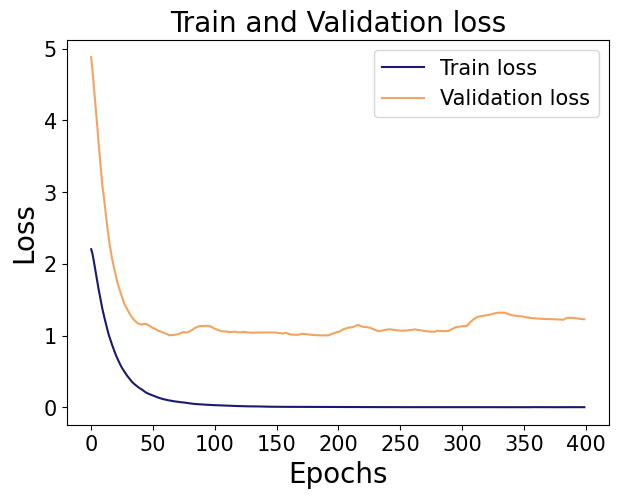

In [273]:
import matplotlib.pyplot as plt
train_loss_min=[]
train_loss_max=[]
train_loss_mean =[]
for i in range(0, 400):
    maxv=max(train_loss[j][i] for j in range(33))
    minv=min(train_loss[j][i] for j in range(33))
    meanv=sum(train_loss[j][i] for j in range(33)) / 33
    train_loss_min.append(minv)
    train_loss_max.append(maxv)
    train_loss_mean.append(meanv)

val_loss_min=[]
val_loss_max=[]
val_loss_mean=[]
for i in range(0, 400):
    maxv=max(val_loss[j][i] for j in range(33))
    minv=min(val_loss[j][i] for j in range(33))
    meanv=sum(val_loss[j][i] for j in range(33)) / 33
    val_loss_min.append(minv)
    val_loss_max.append(maxv)
    val_loss_mean.append(meanv)
    

i=399
w = np.array([val_loss[j][i] for j in range(33)])
s = np.std(w)
meanv=np.mean(w)
print(s, meanv)




epochs = range(0,400)

f=plt.figure(figsize=[7,5])
plt.plot(epochs, smooth_curve(train_loss_mean), 'k', color='midnightblue',label='Train loss')
# plt.fill_between(epochs, smooth_curve(train_loss_min), smooth_curve(train_loss_max),alpha=0.5, edgecolor='midnightblue', facecolor='midnightblue')
plt.plot(epochs, smooth_curve(val_loss_mean), 'k', color='sandybrown',label='Validation loss')
# plt.fill_between(epochs, smooth_curve(val_loss_min), smooth_curve(val_loss_max),alpha=0.5, edgecolor='sandybrown', facecolor='sandybrown')
plt.title('Train and Validation loss',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig('Trainingloss_loo.png', dpi=600)

0.28747978728803447 0.9090909090909091


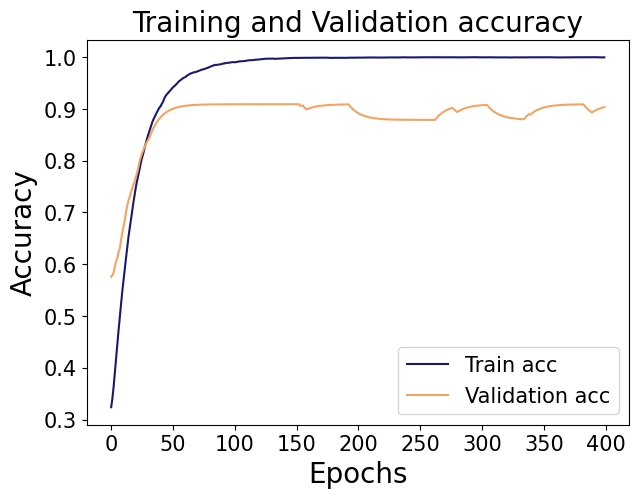

In [272]:
import matplotlib.pyplot as plt
train_acc_min=[]
train_acc_max=[]
train_acc_mean =[]
for i in range(0, 400):
    maxv=max(train_acc[j][i] for j in range(33))
    minv=min(train_acc[j][i] for j in range(33))
    meanv=sum(train_acc[j][i] for j in range(33)) / 33
    train_acc_min.append(minv)
    train_acc_max.append(maxv)
    train_acc_mean.append(meanv)


val_acc_min=[]
val_acc_max=[]
val_acc_mean=[]
for i in range(0, 400):
    maxv=max(val_acc[j][i] for j in range(33))
    minv=min(val_acc[j][i] for j in range(33))
    meanv=sum(val_acc[j][i] for j in range(33)) / 33
    val_acc_min.append(minv)
    val_acc_max.append(maxv)
    val_acc_mean.append(meanv)


i=399
w = np.array([val_acc[j][i] for j in range(33)])
s=np.std(w)
meanv=np.mean(w)
print(s, meanv)


f=plt.figure(figsize=[7,5])
plt.plot(epochs, smooth_curve(train_acc_mean), 'k', color='midnightblue',label='Train acc')
# plt.fill_between(epochs, smooth_curve(train_acc_min), smooth_curve(train_acc_max),alpha=0.5, facecolor='midnightblue')
plt.plot(epochs, smooth_curve(val_acc_mean), 'k', color='sandybrown',label='Validation acc')
# plt.fill_between(epochs, smooth_curve(val_acc_min), smooth_curve(val_acc_max),alpha=0.5, facecolor='sandybrown')
plt.title('Training and Validation accuracy',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(["train","test"],loc="upper left")
plt.legend(loc = 4,fontsize=15)
plt.savefig('Trainingacc2.png', dpi=600)
plt.show()


## Model with Similarity Layer


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, BatchNormalization, Dropout, LSTM, SpatialDropout1D, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

df = pd.read_pickle('processed_data.pkl')

X_raweeg = np.stack(df['raweeg'].values)
X_features = np.stack(df['features'].values)
Y_labels = df['label'].values

# Remove class 3
mask = Y_labels != 3
X_raweeg = X_raweeg[mask]
X_features = X_features[mask]
Y_labels = Y_labels[mask]

num_classes = len(np.unique(Y_labels))
Y_labels = to_categorical(Y_labels, num_classes=num_classes)

scaler = StandardScaler()
X_raweeg = scaler.fit_transform(X_raweeg.reshape(-1, X_raweeg.shape[-1])).reshape(X_raweeg.shape)
X_features = scaler.fit_transform(X_features.reshape(-1, X_features.shape[-1])).reshape(X_features.shape)
X_raweeg[X_raweeg == 0] = np.random.normal(loc=0, scale=1e-6, size=np.sum(X_raweeg == 0))


X_resampled, Y_resampled, Xf_resampled = [], [], []
labels = np.argmax(Y_labels, axis=1)
for cls in np.unique(labels):
    cls_indices = np.where(labels == cls)[0]
    X_cls_raweeg = X_raweeg[cls_indices]
    X_cls_features = X_features[cls_indices]
    Y_cls = Y_labels[cls_indices]
    X_cls_raweeg, Y_cls, X_cls_features = resample(X_cls_raweeg, Y_cls, X_cls_features, n_samples=max([len(np.where(labels == c)[0]) for c in np.unique(labels)]), random_state=42)
    X_resampled.append(X_cls_raweeg)
    Y_resampled.append(Y_cls)
    Xf_resampled.append(X_cls_features)

X_raweeg = np.vstack(X_resampled)
Y_labels = np.vstack(Y_resampled)
X_features = np.vstack(Xf_resampled)

X_train_raweeg, X_test_raweeg, X_train_features, X_test_features, Y_train, Y_test = train_test_split(
    X_raweeg, X_features, Y_labels, test_size=0.3, random_state=42, stratify=np.argmax(Y_labels, axis=1)
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

X_test_list_similarity=[]
y_test_list_similarity = []
test_loss_similarity = []
train_loss_similarity = []
test_acc_similarity = []
train_acc_similarity = []
test_auc_similarity = []
train_auc_similarity = []
val_acc_similarity = []
val_loss_similarity = []
val_auc_similarity = []

for train_index, val_index in kf.split(X_train_raweeg):
    X_train_fold_raweeg, X_val_raweeg = X_train_raweeg[train_index], X_train_raweeg[val_index]
    X_train_fold_features, X_val_features = X_train_features[train_index], X_train_features[val_index]
    Y_train_fold, Y_val = Y_train[train_index], Y_train[val_index]

    input_raweeg = Input(shape=(X_raweeg.shape[1], X_raweeg.shape[2]))
    x_raweeg = LSTM(64, return_sequences=True)(input_raweeg)
    x_raweeg = SpatialDropout1D(0.5)(x_raweeg)
    x_raweeg = Flatten()(x_raweeg)
    x_raweeg = Dense(256, activation='relu')(x_raweeg)
    x_raweeg = BatchNormalization()(x_raweeg)
    x_raweeg = Dropout(0.6)(x_raweeg)
    x_raweeg = Dense(128, activation='relu')(x_raweeg)
    x_raweeg = BatchNormalization()(x_raweeg)
    x_raweeg = Dropout(0.6)(x_raweeg)

    input_features = Input(shape=(X_features.shape[1], X_features.shape[2]))
    x_features = LSTM(64, return_sequences=True)(input_features)
    x_features = SpatialDropout1D(0.5)(x_features)
    x_features = Flatten()(x_features)
    x_features = Dense(256, activation='relu')(x_features)
    x_features = BatchNormalization()(x_features)
    x_features = Dropout(0.6)(x_features)
    x_features = Dense(128, activation='relu')(x_features)
    x_features = BatchNormalization()(x_features)
    x_features = Dropout(0.6)(x_features)

    # combined = Concatenate()([x_raweeg, x_features])

    cosine_similarity = Lambda(lambda tensors: tf.keras.backend.batch_dot(tf.keras.backend.l2_normalize(tensors[0], axis=-1), tf.keras.backend.l2_normalize(tensors[1], axis=-1), axes=1))([x_raweeg, x_features])

    output = Dense(num_classes, activation='softmax')(cosine_similarity)

    model = Model(inputs=[input_raweeg, input_features], outputs=output)

    model.compile(optimizer='rmsprop', loss='crossentropy', metrics=['accuracy', 'AUC'])

    history = model.fit(
        [X_train_fold_raweeg, X_train_fold_features],
        Y_train_fold,
        epochs=400,
        batch_size=64,
        validation_data=([X_val_raweeg, X_val_features], Y_val),
    )
    train_acc_similarity.append(history.history['accuracy'])
    train_loss_similarity.append(history.history['loss'])
    train_auc_similarity.append(history.history['AUC'])
    val_acc_similarity.append(history.history['val_accuracy'])
    val_loss_similarity.append(history.history['val_loss'])
    val_auc_similarity.append(history.history['val_AUC'])

loss, accuracy, auc = model.evaluate([X_test_raweeg, X_test_features], Y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test AUC: {auc:.4f}')

np.save('train_loss_similarity', train_loss_similarity)
np.save('val_loss_similarity', val_loss_similarity)
np.save('train_acc_similarity', train_acc_similarity)
np.save('val_acc_similarity', val_acc_similarity)
np.save('train_auc_similarity', train_auc_similarity)
np.save('test_auc_similarity', val_auc_similarity)


Epoch 1/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - AUC: 0.4688 - accuracy: 0.3571 - loss: 1.1043 - val_AUC: 0.3316 - val_accuracy: 0.1429 - val_loss: 1.2030
Epoch 2/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - AUC: 0.3533 - accuracy: 0.1786 - loss: 1.1125 - val_AUC: 0.3571 - val_accuracy: 0.1429 - val_loss: 1.1952
Epoch 3/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - AUC: 0.5128 - accuracy: 0.2857 - loss: 1.0954 - val_AUC: 0.3418 - val_accuracy: 0.1429 - val_loss: 1.2027
Epoch 4/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - AUC: 0.4158 - accuracy: 0.3214 - loss: 1.1098 - val_AUC: 0.3061 - val_accuracy: 0.1429 - val_loss: 1.2080
Epoch 5/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - AUC: 0.5115 - accuracy: 0.3214 - loss: 1.0946 - val_AUC: 0.2704 - val_accuracy: 0.1429 - val_loss: 1.2000
Epoch 6/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - AUC: 0.4480 - accuracy: 0.3214 - loss: 1.1071 - val_AUC: 0.3418 - val_accuracy: 0.1429 - val_loss: 1.2037
Epoch 7/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/ste

## Cross attention layer

In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, BatchNormalization, Dropout, LSTM, SpatialDropout1D, Lambda, MultiHeadAttention
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import LeaveOneOut, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

df = pd.read_pickle('processed_data.pkl')

X_raweeg = np.stack(df['raweeg'].values)
X_features = np.stack(df['features'].values)
Y_labels = df['label'].values

# Remove class 3
mask = Y_labels != 3
X_raweeg = X_raweeg[mask]
X_features = X_features[mask]
Y_labels = Y_labels[mask]

num_classes = len(np.unique(Y_labels))
Y_labels = to_categorical(Y_labels, num_classes=num_classes)

scaler = StandardScaler()
X_raweeg = scaler.fit_transform(X_raweeg.reshape(-1, X_raweeg.shape[-1])).reshape(X_raweeg.shape)
X_features = scaler.fit_transform(X_features.reshape(-1, X_features.shape[-1])).reshape(X_features.shape)

# Replace padding zeros with small noise to avoid learning issues
X_raweeg[X_raweeg == 0] = np.random.normal(loc=0, scale=1e-6, size=np.sum(X_raweeg == 0))

# Oversample minority classes
X_resampled, Y_resampled, Xf_resampled = [], [], []
labels = np.argmax(Y_labels, axis=1)
for cls in np.unique(labels):
    cls_indices = np.where(labels == cls)[0]
    X_cls_raweeg = X_raweeg[cls_indices]
    X_cls_features = X_features[cls_indices]
    Y_cls = Y_labels[cls_indices]
    X_cls_raweeg, Y_cls, X_cls_features = resample(X_cls_raweeg, Y_cls, X_cls_features, n_samples=max([len(np.where(labels == c)[0]) for c in np.unique(labels)]), random_state=42)
    X_resampled.append(X_cls_raweeg)
    Y_resampled.append(Y_cls)
    Xf_resampled.append(X_cls_features)

X_raweeg = np.vstack(X_resampled)
Y_labels = np.vstack(Y_resampled)
X_features = np.vstack(Xf_resampled)

# Split into train and test sets
X_train_raweeg, X_test_raweeg, X_train_features, X_test_features, Y_train, Y_test = train_test_split(
    X_raweeg, X_features, Y_labels, test_size=0.3, random_state=42, stratify=np.argmax(Y_labels, axis=1)
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

X_test_list_attention = []
y_test_list_attention = []
test_loss_attention = []
train_loss_attention = []
test_acc_attention = []
train_acc_attention = []
test_auc_attention = []
train_auc_attention = []
val_acc_attention = []
val_loss_attention = []
val_auc_attention = []

for train_index, val_index in kf.split(X_train_raweeg):
    X_train_fold_raweeg, X_val_raweeg = X_train_raweeg[train_index], X_train_raweeg[val_index]
    X_train_fold_features, X_val_features = X_train_features[train_index], X_train_features[val_index]
    Y_train_fold, Y_val = Y_train[train_index], Y_train[val_index]

    input_raweeg = Input(shape=(X_raweeg.shape[1], X_raweeg.shape[2]))
    x_raweeg = LSTM(64, return_sequences=True)(input_raweeg)
    x_raweeg = SpatialDropout1D(0.5)(x_raweeg)
    x_raweeg = Flatten()(x_raweeg)
    x_raweeg = Dense(256, activation='relu')(x_raweeg)
    x_raweeg = BatchNormalization()(x_raweeg)
    x_raweeg = Dropout(0.6)(x_raweeg)
    x_raweeg = Dense(128, activation='relu')(x_raweeg)
    x_raweeg = BatchNormalization()(x_raweeg)
    x_raweeg = Dropout(0.6)(x_raweeg)

    input_features = Input(shape=(X_features.shape[1], X_features.shape[2]))
    x_features = LSTM(64, return_sequences=True)(input_features)
    x_features = SpatialDropout1D(0.5)(x_features)
    x_features = Flatten()(x_features)
    x_features = Dense(256, activation='relu')(x_features)
    x_features = BatchNormalization()(x_features)
    x_features = Dropout(0.6)(x_features)
    x_features = Dense(128, activation='relu')(x_features)
    x_features = BatchNormalization()(x_features)
    x_features = Dropout(0.6)(x_features)

    cross_attention = MultiHeadAttention(num_heads=4, key_dim=128)(x_raweeg[:, tf.newaxis, :], x_features[:, tf.newaxis, :])
    cross_attention = Flatten()(cross_attention)

    # cosine_similarity = Lambda(lambda tensors: tf.keras.backend.batch_dot(tf.keras.backend.l2_normalize(tensors[0], axis=-1), tf.keras.backend.l2_normalize(tensors[1], axis=-1), axes=1))([x_raweeg, x_features])
    # combined = Concatenate()([cross_attention, cosine_similarity])
    combined = cross_attention

    output = Dense(num_classes, activation='softmax')(combined)

    model = Model(inputs=[input_raweeg, input_features], outputs=output)

    model.compile(optimizer='rmsprop', loss='crossentropy', metrics=['accuracy', 'AUC'])

    history = model.fit(
        [X_train_fold_raweeg, X_train_fold_features],
        Y_train_fold,
        epochs=400,
        batch_size=64,
        validation_data=([X_val_raweeg, X_val_features], Y_val),
    )
    train_acc_attention.append(history.history['accuracy'])
    train_loss_attention.append(history.history['loss'])
    train_auc_attention.append(history.history['AUC'])
    val_acc_attention.append(history.history['val_accuracy'])
    val_loss_attention.append(history.history['val_loss'])
    val_auc_attention.append(history.history['val_AUC'])

loss, accuracy, auc = model.evaluate([X_test_raweeg, X_test_features], Y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test AUC: {auc:.4f}')

np.save('train_loss_attention', train_loss_attention)
np.save('val_loss_attention', val_loss_attention)
np.save('train_acc_attention', train_acc_attention)
np.save('val_acc_attention', val_acc_attention)
np.save('train_auc_attention', train_auc_attention)
np.save('test_auc_attention', val_auc_attention)


Epoch 1/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - AUC: 0.4149 - accuracy: 0.2143 - loss: 1.1836 - val_AUC: 0.6378 - val_accuracy: 0.4286 - val_loss: 1.0568
Epoch 2/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - AUC: 0.7133 - accuracy: 0.5714 - loss: 1.0394 - val_AUC: 0.5408 - val_accuracy: 0.5714 - val_loss: 1.5047
Epoch 3/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - AUC: 0.6846 - accuracy: 0.5357 - loss: 1.0901 - val_AUC: 0.5000 - val_accuracy: 0.2857 - val_loss: 1.9318
Epoch 4/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - AUC: 0.5013 - accuracy: 0.2857 - loss: 1.7224 - val_AUC: 0.3724 - val_accuracy: 0.1429 - val_loss: 2.9932
Epoch 5/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - AUC: 0.8438 - accuracy: 0.6429 - loss: 0.7418 - val_AUC: 0.4898 - val_accuracy: 0.4286 - val_loss: 1.8054
Epoch 6/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - AUC: 0.8371 - accuracy: 0.6071 - loss: 0.7420 - val_AUC: 0.5357 - val_accuracy: 0.2857 - val_loss: 2.1392
Epoch 7/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/ste

## Self-Attention and Cross-Attention layers

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, Dropout, LSTM, Bidirectional, LayerNormalization, MultiHeadAttention, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler

# Load Data
df = pd.read_pickle('processed_data.pkl')

X_raweeg = np.stack(df['raweeg'].values)
X_features = np.stack(df['features'].values)
Y_labels = df['label'].values

# Remove class 3
mask = Y_labels != 3
X_raweeg = X_raweeg[mask]
X_features = X_features[mask]
Y_labels = Y_labels[mask]

# Convert labels to categorical
num_classes = len(np.unique(Y_labels))
Y_labels = to_categorical(Y_labels, num_classes=num_classes)

# Apply StandardScaler
scaler = StandardScaler()
X_raweeg = scaler.fit_transform(X_raweeg.reshape(-1, X_raweeg.shape[-1])).reshape(X_raweeg.shape)
X_features = scaler.fit_transform(X_features.reshape(-1, X_features.shape[-1])).reshape(X_features.shape)

# Flatten for SMOTE
X_raweeg_flat = X_raweeg.reshape(X_raweeg.shape[0], -1)
X_features_flat = X_features.reshape(X_features.shape[0], -1)
Y_labels_flat = np.argmax(Y_labels, axis=1)  # Convert one-hot back to labels for SMOTE

# Compute the minimum class sample count
unique_classes, class_counts = np.unique(Y_labels_flat, return_counts=True)
min_samples_per_class = min(class_counts)

# Dynamically adjust k_neighbors for SMOTE
k_neighbors = max(1, min(min_samples_per_class - 1, 3))  # Ensure k < min class count

# If any class has fewer than `k+1` samples, use Random Oversampling first
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled_flat, Y_labels_resampled = ros.fit_resample(
    np.hstack([X_raweeg_flat, X_features_flat]), Y_labels_flat
)

# Now apply SMOTE after oversampling
smote = SMOTE(k_neighbors=k_neighbors, random_state=42)
X_combined_flat, Y_labels_resampled = smote.fit_resample(X_resampled_flat, Y_labels_resampled)

# Update num_classes after SMOTE
num_classes = len(np.unique(Y_labels_resampled))

# Reshape data back to original format
split_point = X_raweeg_flat.shape[1]
X_raweeg = X_combined_flat[:, :split_point].reshape(-1, *X_raweeg.shape[1:])
X_features = X_combined_flat[:, split_point:].reshape(-1, *X_features.shape[1:])
Y_labels = to_categorical(Y_labels_resampled, num_classes=num_classes)

# Split into train and test sets (keep test set separate for final evaluation)
X_train_raweeg, X_test_raweeg, X_train_features, X_test_features, Y_train, Y_test = train_test_split(
    X_raweeg, X_features, Y_labels, test_size=0.2, random_state=42, stratify=np.argmax(Y_labels, axis=1)
)

# Define K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_metrics = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_raweeg, np.argmax(Y_train, axis=1))):
    print(f"\nTraining fold {fold+1}/5")

    X_train_fold_raweeg, X_val_raweeg = X_train_raweeg[train_idx], X_train_raweeg[val_idx]
    X_train_fold_features, X_val_features = X_train_features[train_idx], X_train_features[val_idx]
    Y_train_fold, Y_val = Y_train[train_idx], Y_train[val_idx]

    # Define Multi-Head Attention Layer
    def attention_block(inputs, num_heads=4):
        attn = MultiHeadAttention(num_heads=num_heads, key_dim=64)(inputs, inputs)
        norm = LayerNormalization()(attn + inputs)
        return norm

    # EEG Tower
    input_raweeg = Input(shape=(X_raweeg.shape[1], X_raweeg.shape[2]))
    x_raweeg = Bidirectional(LSTM(128, return_sequences=True))(input_raweeg)
    x_raweeg = attention_block(x_raweeg)
    x_raweeg = Flatten()(x_raweeg)
    x_raweeg = Dense(256, activation='relu')(x_raweeg)
    x_raweeg = LayerNormalization()(x_raweeg)
    x_raweeg = Dropout(0.5)(x_raweeg)
    x_raweeg = Dense(128, activation='relu')(x_raweeg)
    x_raweeg = LayerNormalization()(x_raweeg)
    x_raweeg = Dropout(0.4)(x_raweeg)

    # Feature Tower
    input_features = Input(shape=(X_features.shape[1], X_features.shape[2]))
    x_features = Bidirectional(LSTM(128, return_sequences=True))(input_features)
    x_features = attention_block(x_features)
    x_features = Flatten()(x_features)
    x_features = Dense(256, activation='relu')(x_features)
    x_features = LayerNormalization()(x_features)
    x_features = Dropout(0.5)(x_features)
    x_features = Dense(128, activation='relu')(x_features)
    x_features = LayerNormalization()(x_features)
    x_features = Dropout(0.3)(x_features)

    # Cross-Attention Module
    cross_attn1 = MultiHeadAttention(num_heads=4, key_dim=64)(Reshape((1, -1))(x_raweeg), Reshape((1, -1))(x_features))
    cross_attn2 = MultiHeadAttention(num_heads=4, key_dim=64)(Reshape((1, -1))(x_features), Reshape((1, -1))(x_raweeg))

    x_raweeg = LayerNormalization()(cross_attn1[:, 0, :] + x_raweeg)
    x_features = LayerNormalization()(cross_attn2[:, 0, :] + x_features)

    # Final Fusion
    combined = Concatenate()([x_raweeg, x_features])
    output = Dense(num_classes, activation='softmax')(combined)

    # Define Model
    model = Model(inputs=[input_raweeg, input_features], outputs=output)

    # Compile Model with Gradient Clipping
    model.compile(optimizer=AdamW(learning_rate=3e-4, clipnorm=1.0), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train Model
    model.fit(
        [X_train_fold_raweeg, X_train_fold_features],
        Y_train_fold,
        epochs=100,
        batch_size=64,
        validation_data=([X_val_raweeg, X_val_features], Y_val),
        verbose=1
    )

    # Evaluate Model on Validation Set
    val_loss, val_acc = model.evaluate([X_val_raweeg, X_val_features], Y_val)
    fold_metrics.append(val_acc)

# Report Mean Accuracy Across Folds
mean_val_acc = np.mean(fold_metrics)
print(f"\nMean Validation Accuracy Across Folds: {mean_val_acc:.4f}")

# Final Test Evaluation
test_loss, test_acc = model.evaluate([X_test_raweeg, X_test_features], Y_test)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")

# Save Results
np.save('kfold_val_acc.npy', fold_metrics)
np.save('final_test_acc.npy', test_acc)

print("K-Fold Training and Final Test Evaluation Completed Successfully!")



Training fold 1/5
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - accuracy: 0.3158 - loss: 1.8448 - val_accuracy: 0.5000 - val_loss: 1.0635
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5789 - loss: 1.0014 - val_accuracy: 0.7000 - val_loss: 0.6832
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.7105 - loss: 0.7633 - val_accuracy: 1.0000 - val_loss: 0.1930
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.7895 - loss: 0.4754 - val_accuracy: 0.9000 - val_loss: 0.2551
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.7895 - loss: 0.5487 - val_accuracy: 0.9000 - val_loss: 0.3782
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.8684 - loss: 0.4382 - val_accuracy: 0.9000 - val_loss: 0.3942
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.8158 - loss: 0.3576 - val_accuracy: 0.9000 - val_loss: 0.3410
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.8421 - loss: 0.3908 - val_accuracy: 0.900

# Only EEG Data

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout, LSTM, SpatialDropout1D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Load dataset
df = pd.read_pickle('processed_data_full.pkl')

X_raweeg = np.stack(df['raweeg'].values)
Y_labels = df['label'].values

# Remove class 3
mask = Y_labels != 3
X_raweeg = X_raweeg[mask]
Y_labels = Y_labels[mask]

# One-hot encoding
num_classes = len(np.unique(Y_labels))
Y_labels = to_categorical(Y_labels, num_classes=num_classes)

# Standardize
scaler = StandardScaler()
X_raweeg = scaler.fit_transform(X_raweeg.reshape(-1, X_raweeg.shape[-1])).reshape(X_raweeg.shape)
X_raweeg[X_raweeg == 0] = np.random.normal(loc=0, scale=1e-6, size=np.sum(X_raweeg == 0))

# Balance classes
X_resampled, Y_resampled = [], []
labels = np.argmax(Y_labels, axis=1)
for cls in np.unique(labels):
    cls_indices = np.where(labels == cls)[0]
    X_cls_raweeg = X_raweeg[cls_indices]
    Y_cls = Y_labels[cls_indices]
    X_cls_raweeg, Y_cls = resample(X_cls_raweeg, Y_cls, 
                                   n_samples=max([len(np.where(labels == c)[0]) for c in np.unique(labels)]), 
                                   random_state=42)
    X_resampled.append(X_cls_raweeg)
    Y_resampled.append(Y_cls)

X_raweeg = np.vstack(X_resampled)
Y_labels = np.vstack(Y_resampled)

# Split into train-test
X_train_raweeg, X_test_raweeg, Y_train, Y_test = train_test_split(
    X_raweeg, Y_labels, test_size=0.3, random_state=42, stratify=np.argmax(Y_labels, axis=1)
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize metrics
train_loss, train_acc, train_auc = [], [], []
test_loss, test_acc, test_auc = [], [], []
test_predictions = []

# K-Fold cross-validation
for train_index, test_index in kf.split(X_train_raweeg):
    X_train_fold_raweeg, X_test_fold_raweeg = X_train_raweeg[train_index], X_train_raweeg[test_index]
    Y_train_fold, Y_test_fold = Y_train[train_index], Y_train[test_index]

    input_raweeg = Input(shape=(X_raweeg.shape[1], X_raweeg.shape[2]))
    x_raweeg = LSTM(64, return_sequences=True)(input_raweeg)
    x_raweeg = SpatialDropout1D(0.5)(x_raweeg)
    x_raweeg = Flatten()(x_raweeg)
    x_raweeg = Dense(256, activation='relu')(x_raweeg)
    x_raweeg = BatchNormalization()(x_raweeg)
    x_raweeg = Dropout(0.6)(x_raweeg)
    x_raweeg = Dense(128, activation='relu')(x_raweeg)
    x_raweeg = BatchNormalization()(x_raweeg)
    x_raweeg = Dropout(0.6)(x_raweeg)

    output = Dense(num_classes, activation='softmax')(x_raweeg)
    model = Model(inputs=input_raweeg, outputs=output)

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])

    history = model.fit(
        X_train_fold_raweeg, Y_train_fold,
        epochs=400, batch_size=64
    )

    train_acc.append(history.history['accuracy'])
    train_loss.append(history.history['loss'])
    train_auc.append(history.history['AUC'])

    test_metrics = model.evaluate(X_test_fold_raweeg, Y_test_fold)
    test_loss.append(test_metrics[0])
    test_acc.append(test_metrics[1])
    test_auc.append(test_metrics[2])

    Y_pred_probs = model.predict(X_test_fold_raweeg)
    test_predictions.append((np.argmax(Y_test_fold, axis=1), np.argmax(Y_pred_probs, axis=1)))

# Train final model on full training data
final_model = Model(inputs=input_raweeg, outputs=output)
final_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])
final_model.fit(X_train_raweeg, Y_train, epochs=400, batch_size=64)

# Evaluate on test set
Y_pred_probs = final_model.predict(X_test_raweeg)
Y_pred = np.argmax(Y_pred_probs, axis=1)
Y_true = np.argmax(Y_test, axis=1)

# Calculate metrics
precision = precision_score(Y_true, Y_pred, average='macro')
recall = recall_score(Y_true, Y_pred, average='macro')
f1 = f1_score(Y_true, Y_pred, average='macro')

# Sensitivity = Recall
sensitivity = recall

# Specificity calculation
cm = confusion_matrix(Y_true, Y_pred)
tn = np.sum(cm) - (np.sum(cm, axis=1) - np.diag(cm)) - (np.sum(cm, axis=0) - np.diag(cm)) - np.diag(cm)
fp = np.sum(cm, axis=0) - np.diag(cm)
specificity = np.mean(tn / (tn + fp))

# Save metrics
metrics = {
    'Precision': precision,
    'Recall (Sensitivity)': recall,
    'F1-score': f1,
    'Specificity': specificity,
    'Confusion Matrix': cm.tolist()
}

with open('classification_metrics_onlyeeg.txt', 'w') as f:
    for key, value in metrics.items():
        f.write(f"{key}: {value}\n")

np.save('train_loss_onlyeeg', train_loss)
np.save('train_acc_onlyeeg', train_acc)
np.save('train_auc_onlyeeg', train_auc)
np.save('test_loss_onlyeeg', test_loss)
np.save('test_acc_onlyeeg', test_acc)
np.save('test_auc_onlyeeg', test_auc)


Epoch 1/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 341ms/step - AUC: 0.6289 - accuracy: 0.4608 - loss: 1.7906
Epoch 2/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 373ms/step - AUC: 0.5343 - accuracy: 0.3294 - loss: 2.1774
Epoch 3/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 345ms/step - AUC: 0.5649 - accuracy: 0.3884 - loss: 1.9813
Epoch 4/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 333ms/step - AUC: 0.5291 - accuracy: 0.3286 - loss: 2.0742
Epoch 5/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 345ms/step - AUC: 0.4383 - accuracy: 0.2861 - loss: 2.3448
Epoch 6/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 346ms/step - AUC: 0.5601 - accuracy: 0.4339 - loss: 2.0378
Epoch 7/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 329ms/step - AUC: 0.5795 - accuracy: 0.3346 - loss: 1.5935
Epoch 8/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 345ms/step - AUC: 0.6202 - accuracy: 0.4070 - loss: 1.4431
Epoch 9/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step - AUC: 0.5336 - accuracy: 0.3555 - loss: 1.8267
Epoch 10/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 326ms/step - AUC: 0.6308 - accuracy: 0.4803 - loss: 1.5170
Epoch 11/

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout, LSTM, SpatialDropout1D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Load dataset
df = pd.read_pickle('processed_data_full.pkl')

X_raweeg = np.stack(df['raweeg'].values)
Y_labels = df['label'].values

# Remove class 3
mask = Y_labels != 3
X_raweeg = X_raweeg[mask]
Y_labels = Y_labels[mask]

# One-hot encoding
num_classes = len(np.unique(Y_labels))
Y_labels = to_categorical(Y_labels, num_classes=num_classes)

# Standardize
scaler = StandardScaler()
X_raweeg = scaler.fit_transform(X_raweeg.reshape(-1, X_raweeg.shape[-1])).reshape(X_raweeg.shape)
X_raweeg[X_raweeg == 0] = np.random.normal(loc=0, scale=1e-6, size=np.sum(X_raweeg == 0))

# Balance classes
X_resampled, Y_resampled = [], []
labels = np.argmax(Y_labels, axis=1)
for cls in np.unique(labels):
    cls_indices = np.where(labels == cls)[0]
    X_cls_raweeg = X_raweeg[cls_indices]
    Y_cls = Y_labels[cls_indices]
    X_cls_raweeg, Y_cls = resample(X_cls_raweeg, Y_cls, 
                                   n_samples=max([len(np.where(labels == c)[0]) for c in np.unique(labels)]), 
                                   random_state=42)
    X_resampled.append(X_cls_raweeg)
    Y_resampled.append(Y_cls)

X_raweeg = np.vstack(X_resampled)
Y_labels = np.vstack(Y_resampled)

# Split into train-test-unseen
X_train_raweeg, X_unseen_raweeg, Y_train, Y_unseen = train_test_split(
    X_raweeg, Y_labels, test_size=0.1, random_state=42, stratify=np.argmax(Y_labels, axis=1)
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize metrics
train_loss, train_acc, train_auc = [], [], []
val_loss, val_acc, val_auc = [], [], []

# K-Fold cross-validation
for train_index, val_index in kf.split(X_train_raweeg):
    X_train_fold, X_val_fold = X_train_raweeg[train_index], X_train_raweeg[val_index]
    Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

    input_raweeg = Input(shape=(X_raweeg.shape[1], X_raweeg.shape[2]))
    x_raweeg = LSTM(64, return_sequences=True)(input_raweeg)
    x_raweeg = SpatialDropout1D(0.5)(x_raweeg)
    x_raweeg = Flatten()(x_raweeg)
    x_raweeg = Dense(256, activation='relu')(x_raweeg)
    x_raweeg = BatchNormalization()(x_raweeg)
    x_raweeg = Dropout(0.6)(x_raweeg)
    x_raweeg = Dense(128, activation='relu')(x_raweeg)
    x_raweeg = BatchNormalization()(x_raweeg)
    x_raweeg = Dropout(0.6)(x_raweeg)

    output = Dense(num_classes, activation='softmax')(x_raweeg)
    model = Model(inputs=input_raweeg, outputs=output)

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])

    history = model.fit(
        X_train_fold, Y_train_fold,
        epochs=400, batch_size=64, validation_data=(X_val_fold, Y_val_fold)
    )

    train_acc.append(history.history['accuracy'])
    train_loss.append(history.history['loss'])
    train_auc.append(history.history['AUC'])
    val_acc.append(history.history['val_accuracy'])
    val_loss.append(history.history['val_loss'])
    val_auc.append(history.history['val_AUC'])

# Train final model on full training data
final_model = Model(inputs=input_raweeg, outputs=output)
final_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])
final_model.fit(X_train_raweeg, Y_train, epochs=400, batch_size=64)

# Evaluate on unseen test set
Y_pred_probs = final_model.predict(X_unseen_raweeg)
Y_pred = np.argmax(Y_pred_probs, axis=1)
Y_true = np.argmax(Y_unseen, axis=1)

# Calculate metrics
precision = precision_score(Y_true, Y_pred, average='macro')
recall = recall_score(Y_true, Y_pred, average='macro')
f1 = f1_score(Y_true, Y_pred, average='macro')

# Sensitivity = Recall
sensitivity = recall

# Specificity calculation
cm = confusion_matrix(Y_true, Y_pred)
tn = np.sum(cm) - (np.sum(cm, axis=1) - np.diag(cm)) - (np.sum(cm, axis=0) - np.diag(cm)) - np.diag(cm)
fp = np.sum(cm, axis=0) - np.diag(cm)
specificity = np.mean(tn / (tn + fp))

# Save metrics
metrics = {
    'Precision': precision,
    'Recall (Sensitivity)': recall,
    'F1-score': f1,
    'Specificity': specificity,
    'Confusion Matrix': cm.tolist()
}

with open('classification_metrics__onlyEE_unseen.txt', 'w') as f:
    for key, value in metrics.items():
        f.write(f"{key}: {value}\n")

np.save('train_loss_onlyEE_unseen', train_loss)
np.save('train_acc_onlyEE_unseen', train_acc)
np.save('train_auc_onlyEE_unseen', train_auc)
np.save('val_loss_onlyEE_unseen', val_loss)
np.save('val_acc_onlyEE_unseen', val_acc)
np.save('val_auc_onlyEE_unseen', val_auc)



#  Only coupling Matrixes


In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout, LSTM, SpatialDropout1D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import joblib

df = pd.read_pickle('processed_data.pkl')

X_features = np.stack(df['features'].values)
Y_labels = df['label'].values

mask = Y_labels != 3
X_features = X_features[mask]
Y_labels = Y_labels[mask]

num_classes = len(np.unique(Y_labels))
Y_labels = to_categorical(Y_labels, num_classes=num_classes)

scaler = StandardScaler()
X_features = scaler.fit_transform(X_features.reshape(-1, X_features.shape[-1])).reshape(X_features.shape)
X_features[X_features == 0] = np.random.normal(loc=0, scale=1e-6, size=np.sum(X_features == 0))

X_resampled, Y_resampled = [], []
labels = np.argmax(Y_labels, axis=1)
for cls in np.unique(labels):
    cls_indices = np.where(labels == cls)[0]
    X_cls_features = X_features[cls_indices]
    Y_cls = Y_labels[cls_indices]
    X_cls_features, Y_cls = resample(X_cls_features, Y_cls, n_samples=max([len(np.where(labels == c)[0]) for c in np.unique(labels)]), random_state=42)
    X_resampled.append(X_cls_features)
    Y_resampled.append(Y_cls)

X_features = np.vstack(X_resampled)
Y_labels = np.vstack(Y_resampled)

X_train_features, X_test_features, Y_train, Y_test = train_test_split(
    X_features, Y_labels, test_size=0.3, random_state=42, stratify=np.argmax(Y_labels, axis=1)
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_loss_OnlyFeatures, train_acc_OnlyFeatures, train_auc_OnlyFeatures = [], [], []
val_loss_OnlyFeatures, val_acc_OnlyFeatures, val_auc_OnlyFeatures = [], [], []

for train_index, val_index in kf.split(X_train_features):
    X_train_fold_features, X_val_features = X_train_features[train_index], X_train_features[val_index]
    Y_train_fold, Y_val = Y_train[train_index], Y_train[val_index]

    input_features = Input(shape=(X_features.shape[1], X_features.shape[2]))
    x_features = LSTM(64, return_sequences=True)(input_features)
    x_features = SpatialDropout1D(0.5)(x_features)
    x_features = Flatten()(x_features)
    x_features = Dense(256, activation='relu')(x_features)
    x_features = BatchNormalization()(x_features)
    x_features = Dropout(0.6)(x_features)
    x_features = Dense(128, activation='relu')(x_features)
    x_features = BatchNormalization()(x_features)
    x_features = Dropout(0.6)(x_features)

    output = Dense(num_classes, activation='softmax')(x_features)
    model = Model(inputs=input_features, outputs=output)

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])

    history = model.fit(
        X_train_fold_features, Y_train_fold,
        epochs=200, batch_size=64,
        validation_data=(X_val_features, Y_val)
    )
    train_acc_OnlyFeatures.append(history.history['accuracy'])
    train_loss_OnlyFeatures.append(history.history['loss'])
    train_auc_OnlyFeatures.append(history.history['AUC'])
    val_acc_OnlyFeatures.append(history.history['val_accuracy'])
    val_loss_OnlyFeatures.append(history.history['val_loss'])
    val_auc_OnlyFeatures.append(history.history['val_AUC'])

loss, accuracy, auc = model.evaluate(X_test_features, Y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Y_pred = np.argmax(model.predict(X_test_features), axis=1)
Y_true = np.argmax(Y_test, axis=1)

f1 = f1_score(Y_true, Y_pred, average='weighted')
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
conf_matrix = confusion_matrix(Y_true, Y_pred)

print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')

np.save('train_loss_OnlyFeatures', train_loss_OnlyFeatures)
np.save('val_loss_OnlyFeatures', val_loss_OnlyFeatures)
np.save('train_acc_OnlyFeatures', train_acc_OnlyFeatures)
np.save('val_acc_OnlyFeatures', val_acc_OnlyFeatures)
np.save('train_auc_OnlyFeatures', train_auc_OnlyFeatures)
joblib.dump({'f1': f1, 'precision': precision, 'recall': recall, 'confusion_matrix': conf_matrix}, 'metrics_OnlyFeatures.pkl')


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - AUC: 0.4923 - accuracy: 0.3214 - loss: 2.3626 - val_AUC: 0.4235 - val_accuracy: 0.1429 - val_loss: 2.1175
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - AUC: 0.6818 - accuracy: 0.5000 - loss: 1.5029 - val_AUC: 0.4949 - val_accuracy: 0.1429 - val_loss: 2.2740
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - AUC: 0.7911 - accuracy: 0.7143 - loss: 1.0341 - val_AUC: 0.4490 - val_accuracy: 0.2857 - val_loss: 2.4578
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - AUC: 0.6336 - accuracy: 0.3571 - loss: 1.5581 - val_AUC: 0.4184 - val_accuracy: 0.2857 - val_loss: 1.8010
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - AUC: 0.8422 - accuracy: 0.6786 - loss: 0.8342 - val_AUC: 0.3469 - val_accuracy: 0.2857 - val_loss: 2.1448
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - AUC: 0.9464 - accuracy: 0.8571 - loss: 0.4196 - val_AUC: 0.4337 - val_accuracy: 0.1429 - val_loss: 1.7786
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - AU

['metrics_OnlyFeatures.pkl']

In [30]:
import joblib

# Load the metrics file
metrics = joblib.load('metrics_OnlyFeatures.pkl')
print(metrics)


{'f1': 0.8646197552447552, 'precision': 0.8943452380952381, 'recall': 0.875, 'confusion_matrix': array([[3, 1, 1],
       [0, 5, 0],
       [0, 0, 6]])}


Normalized confusion matrix
[[0.6 0.2 0.2]
 [0.  1.  0. ]
 [0.  0.  1. ]]


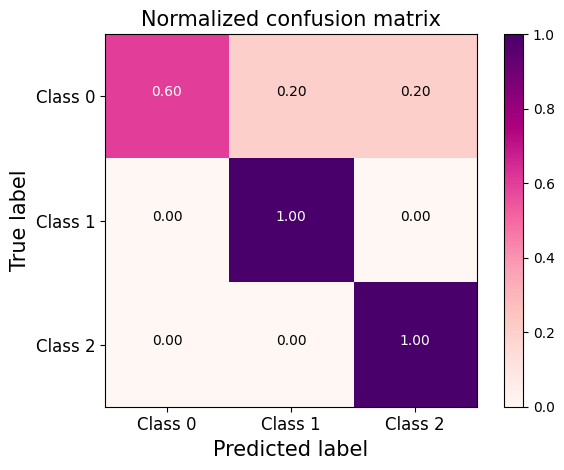

In [35]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.RdPu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=15)
    # plt.clim(0, 370)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes,fontsize=12)
    plt.yticks(tick_marks, classes,fontsize=12)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    plt.tight_layout()

plot_confusion_matrix(metrics['confusion_matrix'], classes=['Class 0', 'Class 1', 'Class 2'], normalize=True, title='Normalized confusion matrix')

# KNN


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df = pd.read_pickle('processed_data.pkl')

X_raweeg = np.stack(df['raweeg'].values)
X_features = np.stack(df['features'].values)
Y_labels = df['label'].values

# Remove class 3
mask = Y_labels != 3
X_raweeg = X_raweeg[mask]
X_features = X_features[mask]
Y_labels = Y_labels[mask]

# Standardize features
scaler = StandardScaler()
X_raweeg = scaler.fit_transform(X_raweeg.reshape(-1, X_raweeg.shape[-1])).reshape(X_raweeg.shape)
X_features = scaler.fit_transform(X_features.reshape(-1, X_features.shape[-1])).reshape(X_features.shape)

# Replace padding zeros with small noise to avoid learning issues
X_raweeg[X_raweeg == 0] = np.random.normal(loc=0, scale=1e-6, size=np.sum(X_raweeg == 0))

# Oversample minority classes
X_resampled, Y_resampled, Xf_resampled = [], [], []
labels = Y_labels  # No need for one-hot encoding in KNN
for cls in np.unique(labels):
    cls_indices = np.where(labels == cls)[0]
    X_cls_raweeg = X_raweeg[cls_indices]
    X_cls_features = X_features[cls_indices]
    Y_cls = Y_labels[cls_indices]
    X_cls_raweeg, Y_cls, X_cls_features = resample(
        X_cls_raweeg, Y_cls, X_cls_features,
        n_samples=max([len(np.where(labels == c)[0]) for c in np.unique(labels)]),
        random_state=42
    )
    X_resampled.append(X_cls_raweeg)
    Y_resampled.append(Y_cls)
    Xf_resampled.append(X_cls_features)

X_raweeg = np.vstack(X_resampled)
Y_labels = np.concatenate(Y_resampled)
X_features = np.vstack(Xf_resampled)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []

for train_index, val_index in kf.split(X_raweeg):
    X_train_fold_raweeg, X_val_raweeg = X_raweeg[train_index], X_raweeg[val_index]
    X_train_fold_features, X_val_features = X_features[train_index], X_features[val_index]
    Y_train_fold, Y_val = Y_labels[train_index], Y_labels[val_index]

    # Combine feature sets
    X_train_combined = np.hstack([X_train_fold_raweeg.reshape(X_train_fold_raweeg.shape[0], -1),
                                  X_train_fold_features.reshape(X_train_fold_features.shape[0], -1)])
    X_val_combined = np.hstack([X_val_raweeg.reshape(X_val_raweeg.shape[0], -1),
                                X_val_features.reshape(X_val_features.shape[0], -1)])

    # Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
    knn.fit(X_train_combined, Y_train_fold)

    # Evaluate
    val_preds = knn.predict(X_val_combined)
    fold_accuracies.append(accuracy_score(Y_val, val_preds))

# Report the mean of max accuracies across all folds
print(f'Mean of Max Validation Accuracy across Folds: {np.mean(fold_accuracies):.4f}')


Mean of Max Validation Accuracy across Folds: 0.7000


In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

df = pd.read_pickle('processed_data.pkl')

X_raweeg = np.stack(df['raweeg'].values)
X_features = np.stack(df['features'].values)
Y_labels = df['label'].values

# Remove class 3
mask = Y_labels != 3
X_raweeg = X_raweeg[mask]
X_features = X_features[mask]
Y_labels = Y_labels[mask]

# Standardize features
scaler = StandardScaler()
X_raweeg = scaler.fit_transform(X_raweeg.reshape(-1, X_raweeg.shape[-1])).reshape(X_raweeg.shape)
X_features = scaler.fit_transform(X_features.reshape(-1, X_features.shape[-1])).reshape(X_features.shape)

# Flatten EEG data and combine with features
X_raweeg_flat = X_raweeg.reshape(X_raweeg.shape[0], -1)
X_features_flat = X_features.reshape(X_features.shape[0], -1)
X_combined = np.hstack((X_raweeg_flat, X_features_flat))

# Dimensionality Reduction (PCA)
pca = PCA(n_components=min(20, X_combined.shape[1]))  # Reduce to 20 features max
X_combined = pca.fit_transform(X_combined)

# Feature Selection
selector = SelectKBest(score_func=f_classif, k=15)  # Select top 15 features
X_combined = selector.fit_transform(X_combined, Y_labels)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []
best_k = 11  # Higher k reduces variance
k_values = [7, 11, 15]  # Try even higher k-values
best_acc = 0

for train_index, val_index in kf.split(X_combined):
    X_train_fold, X_val = X_combined[train_index], X_combined[val_index]
    Y_train_fold, Y_val = Y_labels[train_index], Y_labels[val_index]

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan')  # Cosine distance still best
        knn.fit(X_train_fold, Y_train_fold)

        val_preds = knn.predict(X_val)
        acc = accuracy_score(Y_val, val_preds)

        if acc > best_acc:
            best_acc = acc
            best_k = k

    fold_accuracies.append(best_acc)

print(f'Mean Validation Accuracy across Folds: {np.mean(fold_accuracies):.4f}')
print(f'Best k-value found: {best_k}')


Mean Validation Accuracy across Folds: 0.8000
Best k-value found: 7


In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

df = pd.read_pickle('processed_data.pkl')

X_features = np.stack(df['features'].values)
Y_labels = df['label'].values

# Remove class 3
mask = Y_labels != 3
X_features = X_features[mask]
Y_labels = Y_labels[mask]

# Standardize features
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features.reshape(X_features.shape[0], -1))  # Flatten & scale

# Reshape to 2D (needed for PCA & ML models)
X_features = X_features.reshape(X_features.shape[0], -1)

# Dimensionality Reduction (PCA)
pca = PCA(n_components=min(10, X_features.shape[1]))  # Keep max 10 components
X_features = pca.fit_transform(X_features)

# Feature Selection (Keep Top 10 Features)
selector = SelectKBest(score_func=f_classif, k=min(10, X_features.shape[1]))
X_features = selector.fit_transform(X_features, Y_labels)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

xgb_accuracies = []
nb_accuracies = []
mlp_accuracies = []

for train_index, val_index in kf.split(X_features):
    X_train_fold, X_val = X_features[train_index], X_features[val_index]
    Y_train_fold, Y_val = Y_labels[train_index], Y_labels[val_index]

    # 1. XGBoost Classifier
    xgb = XGBClassifier(n_estimators=50, max_depth=3, learning_rate=0.1)
    xgb.fit(X_train_fold, Y_train_fold)
    xgb_preds = xgb.predict(X_val)
    xgb_accuracies.append(accuracy_score(Y_val, xgb_preds))

    # 2. Gaussian Naive Bayes (for small datasets)
    nb = GaussianNB()
    nb.fit(X_train_fold, Y_train_fold)
    nb_preds = nb.predict(X_val)
    nb_accuracies.append(accuracy_score(Y_val, nb_preds))

    # 3. Simple Neural Network (MLP)
    mlp = Sequential([
        Dense(32, activation='relu', input_shape=(X_train_fold.shape[1],)),
        Dense(16, activation='relu'),
        Dense(len(np.unique(Y_labels)), activation='softmax')
    ])
    mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    mlp.fit(X_train_fold, Y_train_fold, epochs=50, batch_size=4, verbose=0)
    mlp_preds = np.argmax(mlp.predict(X_val), axis=1)
    mlp_accuracies.append(accuracy_score(Y_val, mlp_preds))

print(f'Mean XGBoost Accuracy across Folds: {np.mean(xgb_accuracies):.4f}')
print(f'Mean Naive Bayes Accuracy across Folds: {np.mean(nb_accuracies):.4f}')
print(f'Mean MLP Accuracy across Folds: {np.mean(mlp_accuracies):.4f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Mean XGBoost Accuracy across Folds: 0.4667
Mean Naive Bayes Accuracy across Folds: 0.4333
Mean MLP Accuracy across Folds: 0.4190


In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

df = pd.read_pickle('processed_data.pkl')

X_features = np.stack(df['features'].values)
Y_labels = df['label'].values

# Remove class 3
mask = Y_labels != 3
X_features = X_features[mask]
Y_labels = Y_labels[mask]

# Standardize features
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features.reshape(X_features.shape[0], -1))  # Ensure 2D format

kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
auc_scores = []
f1_scores = []

# One-Hot Encoder for AUC Calculation
encoder = OneHotEncoder(sparse_output=False)
Y_labels_onehot = encoder.fit_transform(Y_labels.reshape(-1, 1))

for train_index, val_index in kf.split(X_features):
    X_train_fold, X_val = X_features[train_index], X_features[val_index]
    Y_train_fold, Y_val = Y_labels[train_index], Y_labels[val_index]
    Y_train_fold_onehot, Y_val_onehot = Y_labels_onehot[train_index], Y_labels_onehot[val_index]

    # Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    knn.fit(X_train_fold, Y_train_fold)

    # Predictions
    val_preds = knn.predict(X_val)
    
    # Compute accuracy and F1-score
    accuracy_scores.append(accuracy_score(Y_val, val_preds))
    f1_scores.append(f1_score(Y_val, val_preds, average='weighted'))

    # Compute AUC only if all classes exist in this fold
    if hasattr(knn, "predict_proba") and Y_train_fold.ndim == 1 and len(np.unique(Y_train_fold)) > 1:
        val_probs = knn.predict_proba(X_val)
        
        try:
            auc_scores.append(roc_auc_score(Y_val_onehot, val_probs, multi_class='ovr'))
        except ValueError:
            auc_scores.append(np.nan)  # If AUC calculation fails, store NaN
    else:
        auc_scores.append(np.nan)  # Skip AUC if not computable

# Report mean and std of metrics
print(f'Mean Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}')
print(f'Mean AUC Score: {np.nanmean(auc_scores):.4f} ± {np.nanstd(auc_scores):.4f}')  # Handle NaN in AUC
print(f'Mean F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}')


Mean Accuracy: 0.5857 ± 0.1741
Mean AUC Score: 0.3661 ± 0.1046
Mean F1-Score: 0.4779 ± 0.2115
